In [1]:
! rm -r -f train_set.csv

In [2]:
! rm -r -f train_set

In [3]:
! rm -r -f eval_set

In [4]:
! rm -r -f eval_set.csv

In [5]:
! unzip /content/drive/MyDrive/ML_final/train_data.zip

Archive:  /content/drive/MyDrive/ML_final/train_data.zip
  inflating: train_set.csv           


In [6]:
! unzip /content/drive/MyDrive/ML_final/train_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_set/videos_covers_8b975e89-4dcc-43be-aa93-0736e72010a2.jpg  
  inflating: train_set/videos_covers_8b99c205-b8e9-4f5c-b02d-662ae0cc7fee.jpg  
  inflating: train_set/videos_covers_8b9b850c-7cf8-4070-995b-c5cfd91e1a8a.jpg  
  inflating: train_set/videos_covers_8ba4f810-471d-41ac-8744-84b8308aabb9.jpg  
  inflating: train_set/videos_covers_8ba65b2a-204c-4d10-9eaf-92b6a3bc60ce.jpg  
  inflating: train_set/videos_covers_8ba840be-fda0-4deb-b87f-6388be497f6d.jpg  
  inflating: train_set/videos_covers_8baa3196-8b08-43ab-a88a-d55c3b7204d7.jpg.jpg  
  inflating: train_set/videos_covers_8bc59720-1d58-4f63-b1f4-3a81fcfcb6d6.jpg  
  inflating: train_set/videos_covers_8bc8f0b6-effe-4fea-b8b8-b34b1b5d2099.jpg  
  inflating: train_set/videos_covers_8bcb1bb5-3b4a-4c9b-abd0-88895671c58c.jpg  
  inflating: train_set/videos_covers_8bd12db4-86c2-4d35-b5a1-7259b021fae1.jpg  
  inflating: train_set/videos_covers_8bd61f92-0aae-4773-b687-6e6f

In [7]:
! unzip /content/drive/MyDrive/ML_final/eval_data.zip

Archive:  /content/drive/MyDrive/ML_final/eval_data.zip
  inflating: eval_set.csv            


In [8]:
! unzip /content/drive/MyDrive/ML_final/eval_images.zip

Archive:  /content/drive/MyDrive/ML_final/eval_images.zip
   creating: eval_set/
  inflating: eval_set/series_covers_320e83cf-0ed2-4c43-bc77-0fda45f250cc.jpg  
  inflating: eval_set/series_covers_f49ba050-6d3b-456c-9086-9acf9b7bac69.jpg  
  inflating: eval_set/videos_covers_0004c15a-71eb-414c-92f7-526472af19de.jpg  
  inflating: eval_set/videos_covers_0021c7d9-1e3b-40af-8605-72f688a8d61c.jpg  
  inflating: eval_set/videos_covers_004a7458-8919-4b0d-ad3d-01535f3625ee.jpg  
  inflating: eval_set/videos_covers_0052f91e-6785-41a3-94a1-0bacfcaf4601.jpg  
  inflating: eval_set/videos_covers_0057520d-69f4-447e-b668-23858673753a.jpg  
  inflating: eval_set/videos_covers_0061b103-bedc-40bb-85c1-9d3fca91d4ec.jpg  
  inflating: eval_set/videos_covers_00697042-f299-42a0-88e1-76f429fb6b78.jpg  
  inflating: eval_set/videos_covers_00704445-9340-4579-859b-a4314c7246b7.jpg  
  inflating: eval_set/videos_covers_00a7c6d3-88b4-4484-b10a-ad582fe2469f.jpg  
  inflating: eval_set/videos_covers_00c1291d-1218-

In [9]:
!pip install opencv-python==3.4.2.16 opencv-contrib-python==3.4.2.16

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def vis_list(a, t, y, x):
  plt.plot(np.array(range(len(a)))+1,a)
  plt.title(t)
  plt.ylabel(y)
  plt.xlabel(x)
  plt.grid()
  plt.show()

In [12]:
df = pd.read_csv('train_set.csv')
keys = list(set(list(df['genre'])))
df.head()

,video_id,title_fa,description_fa,age_rating,country_fa,production_year,duration,genre,image
0,_WuOoL_filimo,نیش,همسر و فرزند خردسال یك سروان نیروی انتظامی، كه...,0.0,ایران,1994.0,01:27:22,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...
1,yIaxeg8x,سرگذشت حقیقی دار و دسته کلی,درباره فیلم سرگذشت حقیقی دار و دسته کلی فیلم ...,,انگلستان,2020.0,01:46:00,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...
2,King_Arthur-Legend_of_the_Sword_4d6P2_filimo,شاه آرتور - افسانه شمشیر,آرتور، مرد جوانی است که در دوران کودکی دزدیده ...,0.0,آمریکا,2017.0,02:04:29,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...
3,TJAkVhmb,تارزان و جین,انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...,7.0,آمریکا,2017.0,,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...
4,Life_Cycles_0ym29_filimo,چرخ عمر,مستند چرخ عمر داستانی در مورد یک دوچرخه کوهستا...,13.0,کانادا,2010.0,00:46:58,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...


In [13]:
eval = pd.read_csv('eval_set.csv')
eval.head()

,video_id,title_fa,description_fa,age_rating,country_fa,production_year,duration,image
0,E0yLLCIp,دونده هزارتو,NaN,,آمریکا,2014.0,01:54:00,videos_covers_921fbbc1-0d58-4378-8e5b-92193edf...
1,wCFnNqf6,ماجراهای اسکوارت,در کارتون ماجراهای اسکوارت : سرزمین رویاهای کو...,7.0,کانادا,2003.0,00:49:01,videos_covers_f27599fe-0d9a-47ce-b796-997b2429...
2,2gZF76hm,خانم یایا,عبدالرضا کاهانی نویسنده و کارگردان زاده ۱ دی ۱...,13.0,ایران,2019.0,01:19:15,videos_covers_589607ad-e02f-443f-91f7-ac6c2388...
3,HrSbo_Fullmetal_Alchemist_E_filimo_series,کیمیاگر تمام فلزی,بعد از یک آزمایش شکست خورده کیمیاگری برای زند...,7.0,ژاپن,2003.0,,videos_covers_08cff5a5-0b18-4df5-ac8d-02744a74...
4,Bring_Me_the_Head_of_Alfredo_Garcia_5txA1_filimo,سر آلفردو گارسیا را برایم بیاورید,فیلم سر آلفردو گارسیا را برایم بیاورید اثر کمت...,17.0,آمریکا,1974.0,01:17:11,videos_covers_393f9008-f5fd-43cc-b222-4b28c060...


### train set info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   video_id         11000 non-null  object
 1   title_fa         11000 non-null  object
 2   description_fa   8559 non-null   object
 3   age_rating       11000 non-null  object
 4   country_fa       10882 non-null  object
 5   production_year  11000 non-null  object
 6   duration         11000 non-null  object
 7   genre            11000 non-null  object
 8   image            11000 non-null  object
dtypes: object(9)
memory usage: 773.6+ KB


In [15]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   video_id         1554 non-null   object 
 1   title_fa         1554 non-null   object 
 2   description_fa   1215 non-null   object 
 3   age_rating       1554 non-null   object 
 4   country_fa       1542 non-null   object 
 5   production_year  1554 non-null   float64
 6   duration         1554 non-null   object 
 7   image            1554 non-null   object 
dtypes: float64(1), object(7)
memory usage: 97.2+ KB


### histogram of genre in data

#### we have unbalanced dataset

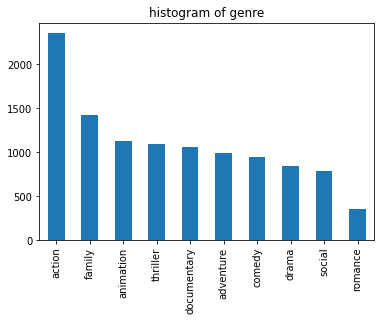

In [16]:
df['genre'].value_counts().plot(kind='bar')
plt.title('histogram of genre')
plt.show()

### number of movies per year

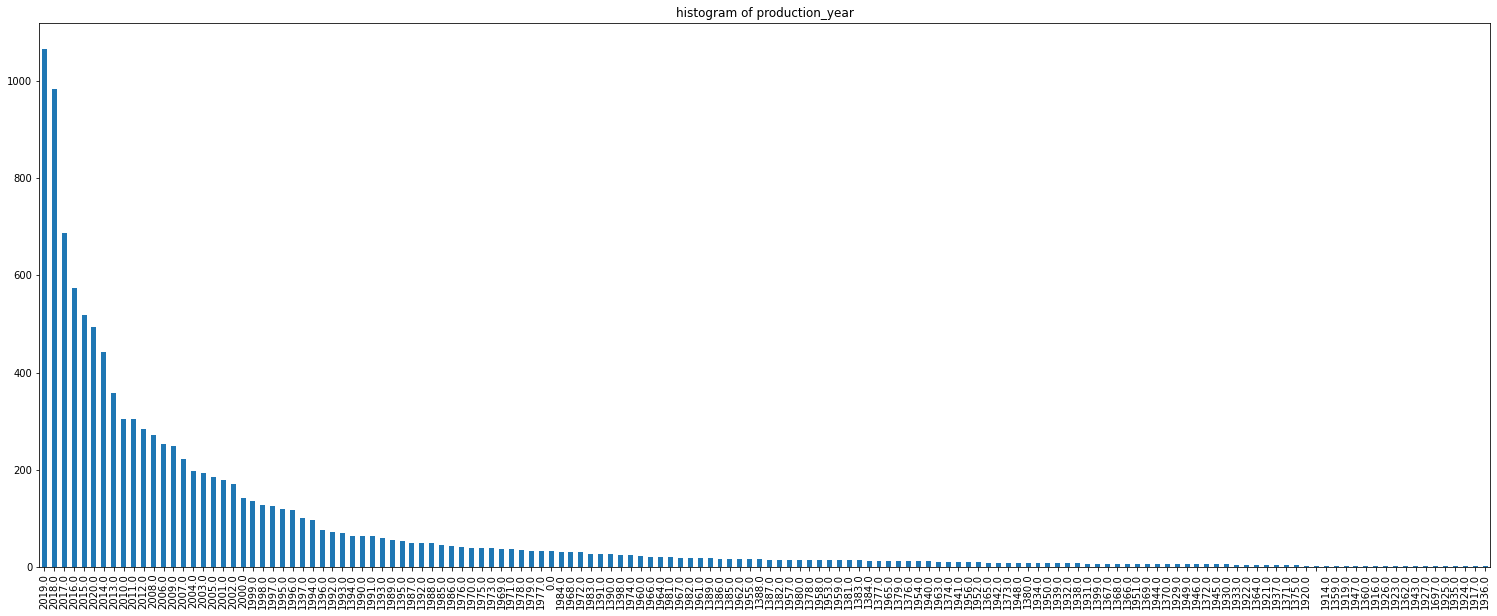

In [17]:
plt.figure(figsize=(26,10))
df['production_year'].value_counts().plot(kind='bar')
plt.title('histogram of production_year')
plt.show()

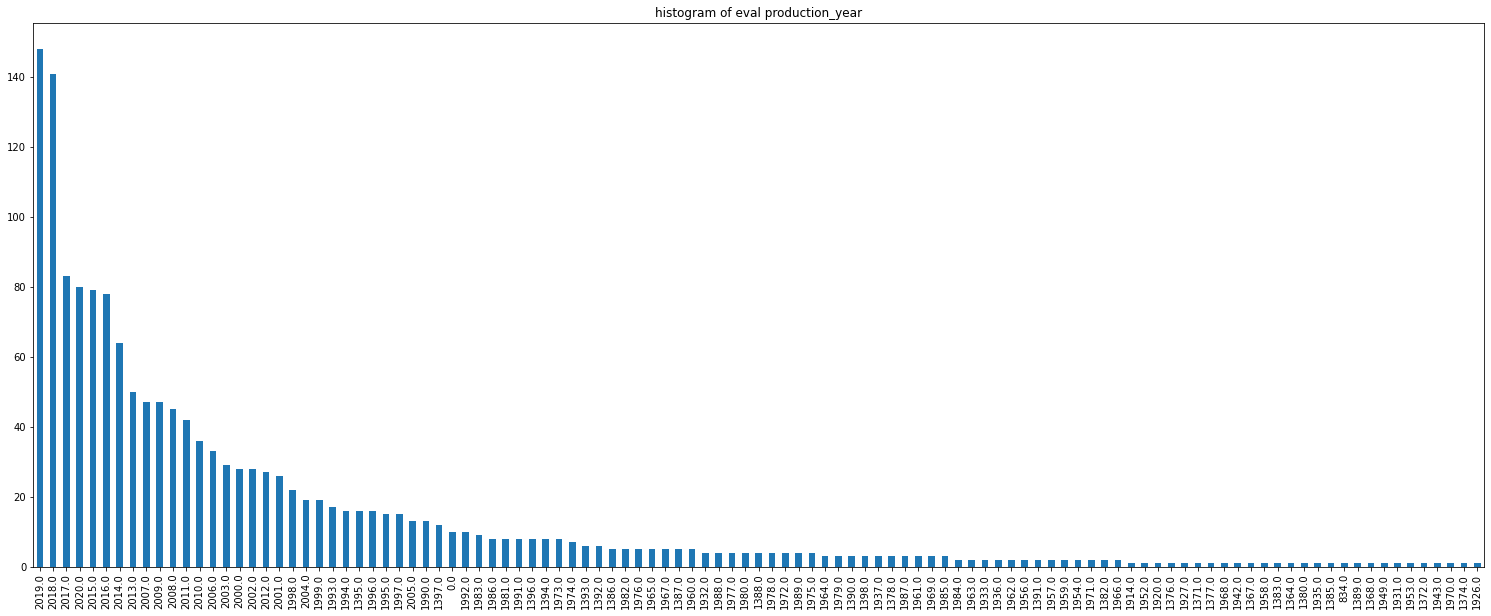

In [18]:
plt.figure(figsize=(26,10))
eval['production_year'].value_counts().plot(kind='bar')
plt.title('histogram of eval production_year')
plt.show()

### number of film in a year and with a specific genre

In [19]:
df.groupby(['production_year', 'genre']).agg(['count'])

video_id title_fa  ... duration image
                             count    count  ...    count count
production_year genre                        ...               
                animation        1        1  ...        1     1
                thriller         1        1  ...        1     1
0.0             action           5        5  ...        5     5
                adventure        4        4  ...        4     4
                animation        4        4  ...        4     4
...                            ...      ...  ...      ...   ...
2020.0          drama           27       27  ...       27    27
                family          51       51  ...       51    51
                romance         10       10  ...       10    10
                social          18       18  ...       18    18
                thriller        91       91  ...       91    91

[919 rows x 7 columns]

### null count for columns

In [20]:
print(df.isnull().sum())

video_id              0
title_fa              0
description_fa     2441
age_rating            0
country_fa          118
production_year       0
duration              0
genre                 0
image                 0
dtype: int64


In [21]:
print(eval.isnull().sum())

video_id             0
title_fa             0
description_fa     339
age_rating           0
country_fa          12
production_year      0
duration             0
image                0
dtype: int64


### replace ' ' in numbric columns to nan

In [22]:
df["age_rating"] = df["age_rating"].replace(' ', np.nan)
df["production_year"] = df["production_year"].replace(' ', np.nan)
df["duration"] = df["duration"].replace(' ', np.nan)

In [23]:
eval["age_rating"] = eval["age_rating"].replace(' ', np.nan)
eval["production_year"] = eval["production_year"].replace(' ', np.nan)
eval["duration"] = eval["duration"].replace(' ', np.nan)

In [24]:
df[["age_rating", "production_year"]] = df[["age_rating", "production_year"]].apply(pd.to_numeric)

In [25]:
eval[["age_rating", "production_year"]] = eval[["age_rating", "production_year"]].apply(pd.to_numeric)

### remove first and last space in country name

In [26]:
df['country_fa'] = df['country_fa'].str.strip()

In [27]:
eval['country_fa'] = eval['country_fa'].str.strip()

### show country_fa condidate

In [28]:
print((set(list(df['country_fa'].str.strip()))))

{nan, 'هلند', 'ایالات متحده آمریکا', 'جمهوری چک', 'برزیل', 'ایران', 'ایتالیا', 'مکزیک', 'چین', 'اتریش', 'ایسلند', 'ایرلند', 'انگلستان', 'امارات متحده عربی', 'شیلی', '-', 'مالزی', 'آفریقای جنوبی', 'دانمارک', 'سوئد', 'افغانستان', 'استرالیا', 'مجارستان', 'آلمان', 'تایلند', 'انگلیس', 'سوییس', 'آمریکا', 'آرژانتین', 'کره جنوبی', 'اندونزی', 'اوکراین', 'نروژ', 'نیوزلند', 'هنگ کنگ', 'هند', 'کانادا', 'چکسلواکی', 'ویتنام', 'روسیه', 'آفریقای شمالی', 'تایوان', 'ترکیه', 'فرانسه', 'سنگاپور', 'فیلیپین', 'فنلاند', 'لهستان', 'پرو', 'بلژیک', 'مقدونیه', 'لوکزامبورگ', 'لبنان', 'غیره', 'ژاپن', 'اسپانیا'}


In [29]:
print((set(list(eval['country_fa'].str.strip()))))

{nan, 'هلند', 'برزیل', 'ایران', 'ایتالیا', 'مکزیک', 'چین', 'لیتوانی', 'ایسلند', 'ایرلند', 'انگلستان', '-', 'دانمارک', 'سوئد', 'استرالیا', 'مجارستان', 'سوییس', 'تایلند', 'آلمان', 'انگلیس', 'آمریکا', 'آرژانتین', 'کره جنوبی', 'نروژ', 'هنگ کنگ', 'هند', 'کانادا', 'روسیه', 'تایوان', 'ترکیه', 'فرانسه', 'فنلاند', 'لهستان', 'پرو', 'بلژیک', 'غیره', 'ژاپن', 'اسپانیا'}


### same meaning country name

In [30]:
df["country_fa"] = df["country_fa"].replace('-', np.nan)
df["country_fa"] = df["country_fa"].replace('انگلیس', 'انگلستان')
df["country_fa"] = df["country_fa"].replace('ایالات متحده آمریکا', 'آمریکا')

In [31]:
eval["country_fa"] = eval["country_fa"].replace('-', np.nan)
eval["country_fa"] = eval["country_fa"].replace('انگلیس', 'انگلستان')
eval["country_fa"] = eval["country_fa"].replace('ایالات متحده آمریکا', 'آمریکا')

### convert duration to seconds, number

In [32]:
df['duration']
def convert_duration_to_seconds(x):
  # print(list(x.values))
  res = []
  for i in list(x.values):
    if i!=i:
      res.append(i)
    else:
      # print(i.split(':'))
      h, m, s = i.split(':')
      res.append((int(h)*3600)+(int(m)*60)+int(s))
  # print(res)
  x = pd.Series(res)
  return x
df = df.apply(lambda x: convert_duration_to_seconds(x) if x.name == 'duration' else x)

In [33]:
eval = eval.apply(lambda x: convert_duration_to_seconds(x) if x.name == 'duration' else x)

### replace nan with mode, nominal feature

In [34]:
df['country_fa'].fillna(df['country_fa'].mode()[0], inplace=True)

In [35]:
eval['country_fa'].fillna(eval['country_fa'].mode()[0], inplace=True)

### plot box of numbric features

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


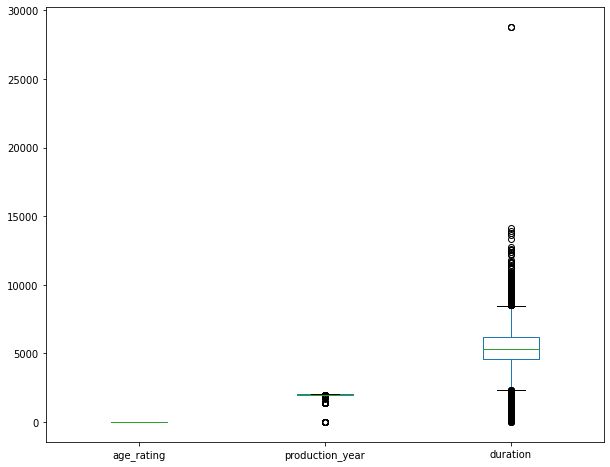

In [36]:
df.plot(kind='box', figsize= (10,8))

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


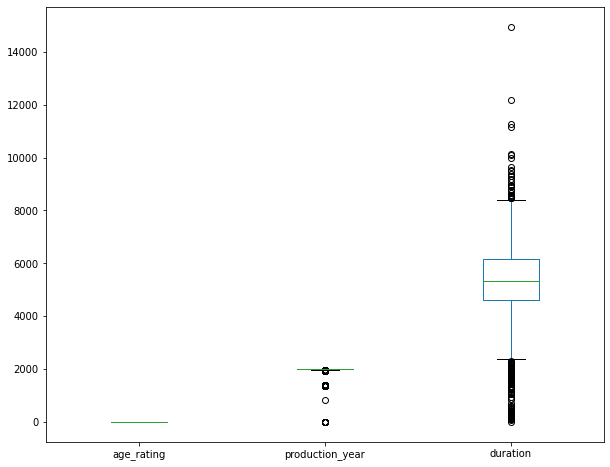

In [37]:
eval.plot(kind='box', figsize= (10,8))

### production_year and duration have outlier we use median to fill null

In [38]:
df['production_year'].fillna(df['production_year'].median(), inplace=True)
df['duration'].fillna(df['duration'].median(), inplace=True)

In [39]:
eval['production_year'].fillna(eval['production_year'].median(), inplace=True)
eval['duration'].fillna(eval['duration'].median(), inplace=True)

### fill null with '' in description_fa, we do not have sentence.

In [40]:
df['description_fa'].fillna('', inplace=True)

In [41]:
eval['description_fa'].fillna('', inplace=True)

### age_rating is categorical, fill with mod of genre

In [42]:
print(df.groupby(['genre'])['age_rating'].agg(pd.Series.mode))
mall = df['age_rating'].mode()[0]
df['age_rating'] = df.groupby(['genre'], sort=False)['age_rating'].apply(lambda x: x.fillna(mall if len(x.mode()) == 0 else x.mode().iloc[0]))

genre
action         17
adventure       7
animation       7
comedy         17
documentary    13
drama          []
family         13
romance        17
social         17
thriller       17
Name: age_rating, dtype: object


In [43]:
eval['age_rating'].fillna(eval['age_rating'].mode()[0], inplace=True)

In [44]:
print(df.isnull().sum())

video_id           0
title_fa           0
description_fa     0
age_rating         0
country_fa         0
production_year    0
duration           0
genre              0
image              0
dtype: int64


In [45]:
print(eval.isnull().sum())

video_id           0
title_fa           0
description_fa     0
age_rating         0
country_fa         0
production_year    0
duration           0
image              0
dtype: int64


In [46]:
df

,video_id,title_fa,description_fa,age_rating,country_fa,production_year,duration,genre,image
0,_WuOoL_filimo,نیش,همسر و فرزند خردسال یك سروان نیروی انتظامی، كه...,0.0,ایران,1994.0,5242.0,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...
1,yIaxeg8x,سرگذشت حقیقی دار و دسته کلی,درباره فیلم سرگذشت حقیقی دار و دسته کلی فیلم ...,17.0,انگلستان,2020.0,6360.0,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...
2,King_Arthur-Legend_of_the_Sword_4d6P2_filimo,شاه آرتور - افسانه شمشیر,آرتور، مرد جوانی است که در دوران کودکی دزدیده ...,0.0,آمریکا,2017.0,7469.0,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...
3,TJAkVhmb,تارزان و جین,انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...,7.0,آمریکا,2017.0,5347.0,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...
4,Life_Cycles_0ym29_filimo,چرخ عمر,مستند چرخ عمر داستانی در مورد یک دوچرخه کوهستا...,13.0,کانادا,2010.0,2818.0,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...
...,...,...,...,...,...,...,...,...,...
10995,_omrwa_filimo,می خواهم زنده بمانم,اصلان و ماه منیر به خاطر اختلافات طلاق میگیر...,13.0,ایران,1994.0,6426.0,family,videos_covers_ff8d33fb-7de2-453d-8fad-333affbd...
10996,Momentum_3y5bP_filimo,مقدار حرکت,در فیلم مقدار حرکت، هنگامی که یک دزد مرموز توس...,17.0,آفریقای جنوبی,2015.0,5734.0,thriller,videos_covers_98ffbfe4-affa-456e-82cd-7251e80c...
10997,U8vw2P8R,گناهکار ذاتی,فیلم گناهکار ذاتی به کارگردانی سویی کوآن لی و ...,17.0,هنگ کنگ,2019.0,5480.0,action,videos_covers_4de8ba64-339e-43dd-996b-4379a101...
10998,L_aveu_7YxLp_filimo,اعتراف,در چکسلواکی کمونیست ۱۹۵۰ یک وزیر و یک قهرمان ...,17.0,فرانسه,1970.0,6976.0,social,videos_covers_7e88e403-b2fb-4560-b346-055433a6...


In [47]:
eval

,video_id,title_fa,description_fa,age_rating,country_fa,production_year,duration,image
0,E0yLLCIp,دونده هزارتو,,17.0,آمریکا,2014.0,6840.0,videos_covers_921fbbc1-0d58-4378-8e5b-92193edf...
1,wCFnNqf6,ماجراهای اسکوارت,در کارتون ماجراهای اسکوارت : سرزمین رویاهای کو...,7.0,کانادا,2003.0,2941.0,videos_covers_f27599fe-0d9a-47ce-b796-997b2429...
2,2gZF76hm,خانم یایا,عبدالرضا کاهانی نویسنده و کارگردان زاده ۱ دی ۱...,13.0,ایران,2019.0,4755.0,videos_covers_589607ad-e02f-443f-91f7-ac6c2388...
3,HrSbo_Fullmetal_Alchemist_E_filimo_series,کیمیاگر تمام فلزی,بعد از یک آزمایش شکست خورده کیمیاگری برای زند...,7.0,ژاپن,2003.0,5340.0,videos_covers_08cff5a5-0b18-4df5-ac8d-02744a74...
4,Bring_Me_the_Head_of_Alfredo_Garcia_5txA1_filimo,سر آلفردو گارسیا را برایم بیاورید,فیلم سر آلفردو گارسیا را برایم بیاورید اثر کمت...,17.0,آمریکا,1974.0,4631.0,videos_covers_393f9008-f5fd-43cc-b222-4b28c060...
...,...,...,...,...,...,...,...,...
1549,_1glWy_filimo,خونرنگ,مستند خونرنگ به توصیف و بررسی و تحلیل جنگ رسان...,13.0,ایران,2016.0,1088.0,videos_covers_c469ba76-c88f-49ce-b054-bdf53677...
1550,EBlocLkU,دوزیست,«دوزیست»، فیلمی در ژانر اجتماعی به کارگردانی «...,17.0,ایران,2010.0,5050.0,videos_covers_b25ebc2d-a6ff-41d1-8c83-1779d463...
1551,_6RaQ3_filimo,جهنم سبز,آقای حیدری كه شكاربان سالخورده منطقه جنگلی حفا...,0.0,ایران,1995.0,5511.0,videos_covers_f920bf5f-c8e8-4e8e-9863-d60ca7ff...
1552,a57zspMm,داستان اسباب‌ بازی,,17.0,آمریکا,1995.0,4860.0,videos_covers_5cc512fd-dee3-4001-b25c-822f925e...


### eliminate outlier in features

In [48]:
cols= ['production_year', 'duration']

df[cols]= df[cols].clip(lower= df[cols].quantile(0.15), upper= df[cols].quantile(0.85), axis=1)

In [49]:
cols= ['production_year', 'duration', 'age_rating']

eval[cols]= eval[cols].clip(lower= eval[cols].quantile(0.15), upper= eval[cols].quantile(0.85), axis=1)

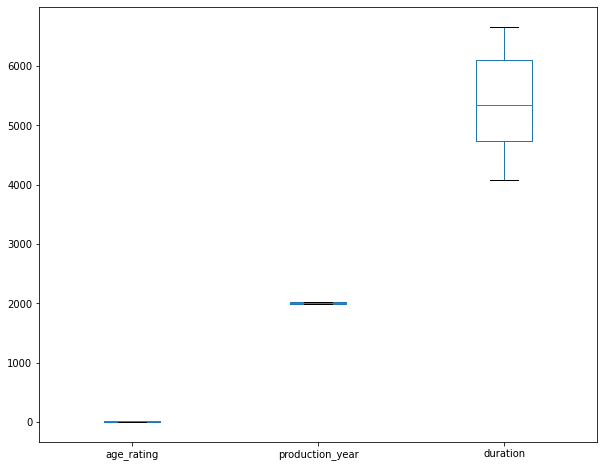

In [50]:
df.plot(kind='box', figsize= (10,8))

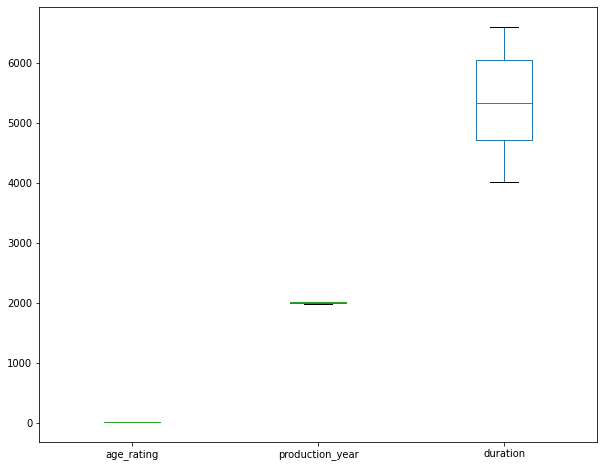

In [51]:
eval.plot(kind='box', figsize= (10,8))

### drop features, 'video_id' does not effect our analysis.

In [52]:
df.drop(columns=['video_id'], axis=1, inplace=True)

In [53]:
eval.drop(columns=['video_id'], axis=1, inplace=True)

### install hazm

In [54]:
!pip install hazm

In [55]:
!pip install stopwords_guilannlp

### clean fa text with hazm

In [56]:
from hazm import *
import re
from stopwords_guilannlp import stopwords_output
import string
from itertools import groupby

puncs = ['،', '.', ',', ':', ';', '"', '«', '»', '>', '<', '?', '{','}', '[', ']',\
         '(', ')', '*', '+', '=', '_', '-', '&', '^', '%', '$', '#', '@', '!', '~', '`',\
         '[', ']', '\'', '۱', '۲', '۳', '۴', '۵', '۶', '۷', '۸', '۹', '۰', '/', '\\']
puncs.extend(list(string.ascii_lowercase))
stop_set = stopwords_output("Persian", "set")
normalizer = Normalizer()
lemmatizer = Lemmatizer()

# turn a doc into clean tokens
def clean_doc(doc):
    doc = normalizer.normalize(doc) # Normalize document using Hazm Normalizer
    tokenized = word_tokenize(doc)  # Tokenize text
    tokens = []
    for t in tokenized:
      temp = t
      for p in puncs:
        temp = temp.replace(p, '')
      tokens.append(temp)
    tokens = [w for w in tokens if not w in stop_set]    # Remove stop words
    tokens = [w for w in tokens if not len(w) <= 1]
    tokens = [w for w in tokens if not w.isdigit()]
    tokens = [lemmatizer.lemmatize(w) for w in tokens] # Lemmatize sentence words using Hazm Lemmatizer
    tokens = ' '.join(tokens)
    res = [x for x, _ in groupby(tokens)] # convert 'aaabbbccc' to abc, Removing neighboring duplicates in list in python [duplicate]

    tokens = ''.join(res)
    return tokens


def tokenize(text):
    text = clean_doc(text)
    return word_tokenize(text)

In [57]:
print(list(df['description_fa'])[2])
tokenize(list(df['description_fa'])[2])

آرتور، مرد جوانی است که در دوران کودکی دزدیده شده و وارث اصلی تاج و تخت است. ولی برای تصاحب تاج و تخت از دست پادشاهی ظالم باید آماده باشد و شمشیر افسانه ای را از سنگ خارج کند. او برای رسیدن به قدرت لازم است آموزش ببیند.


['آرتور',
 'مرد',
 'جوان',
 'دوران',
 'کودک',
 'دزدیده',
 'وارث',
 'اصل',
 'تاج',
 'تخت',
 'تصاحب',
 'تاج',
 'تخت',
 'دست',
 'پادشاه',
 'ظالم',
 'آماده',
 'شمشیر',
 'افسانه',
 'سنگ',
 'خارج',
 'رسیدن',
 'قدرت',
 'لازم',
 'آموزش',
 'بیند']

In [58]:
print(list(eval['description_fa'])[2])
tokenize(list(eval['description_fa'])[2])

عبدالرضا کاهانی نویسنده و کارگردان زاده ۱ دی ۱۳۵۲ نیشابور است. او نویسندگی و کارگردانی ارادتمند؛ نازنین بهاره تینا، از هر نظر معمولی، استراحت مطلق ، وقت داریم حالا، بی خود و بی جهت، اسب حیوان نجیبی است، هیچ، بیست در کارنامه هنری خود دارد که در پاره از آثارش خود تهیه کننده نیز هست. این فیلم داستان دو باجناق است كه پس از فوت پدر زنشان راه او را پى گرفته و به بهانه تجارت در چین گریزى هم به پاتایا میزنند اما رویارویى آن ها با دوست قدیمى همه چیز را به هم میزند...


['عبدالرضا',
 'کاهانی',
 'نویسنده',
 'کارگردان',
 'زاده',
 'دی',
 'نیشابور',
 'نویسندگی',
 'کارگردان',
 'ارادتمند',
 'نازنین',
 'بهاره',
 'تینا',
 'نظر',
 'استراحت',
 'مطلق',
 'وقت',
 'اسب',
 'حیوان',
 'نجیب',
 'بیست',
 'کارنامه',
 'هنر',
 'پاره',
 'آثار',
 'تهیه',
 'فیلم',
 'داستان',
 'باجناق',
 'فوت',
 'پدر',
 'زن',
 'پى',
 'بهانه',
 'تجارت',
 'چین',
 'گریزى',
 'پاتایا',
 'میزند',
 'رویارویى',
 'دوست',
 'قدیمى',
 'میزند']

### concat description_fa and title_fa.

In [59]:
res = []
ds = list(df['description_fa'])
ts = list(df['title_fa'])
for i in range(len(ds)):
  res.append(ts[i]+' '+ds[i])
df['text'] = res

In [60]:
res = []
ds = list(eval['description_fa'])
ts = list(eval['title_fa'])
for i in range(len(ds)):
  res.append(ts[i]+' '+ds[i])
eval['text'] = res

### remove image link from text

In [61]:
res = []
ts = list(df['text'])
ims = list(df['image'])
for i in range(len(ts)):
  res.append(ts[i].replace(ims[i],''))
df['text'] = res

In [62]:
res = []
ts = list(eval['text'])
ims = list(eval['image'])
for i in range(len(ts)):
  res.append(ts[i].replace(ims[i],''))
eval['text'] = res

In [63]:
df.head()

,title_fa,description_fa,age_rating,country_fa,production_year,duration,genre,image,text
0,نیش,همسر و فرزند خردسال یك سروان نیروی انتظامی، كه...,0.0,ایران,1994.0,5242.0,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,نیش همسر و فرزند خردسال یك سروان نیروی انتظامی...
1,سرگذشت حقیقی دار و دسته کلی,درباره فیلم سرگذشت حقیقی دار و دسته کلی فیلم ...,17.0,انگلستان,2018.0,6360.0,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,سرگذشت حقیقی دار و دسته کلی درباره فیلم سرگذشت...
2,شاه آرتور - افسانه شمشیر,آرتور، مرد جوانی است که در دوران کودکی دزدیده ...,0.0,آمریکا,2017.0,6660.0,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,شاه آرتور - افسانه شمشیر آرتور، مرد جوانی است ...
3,تارزان و جین,انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...,7.0,آمریکا,2017.0,5347.0,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,تارزان و جین انیمیشن تارزان و جین به ماجرای تا...
4,چرخ عمر,مستند چرخ عمر داستانی در مورد یک دوچرخه کوهستا...,13.0,کانادا,2010.0,4080.0,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...,چرخ عمر مستند چرخ عمر داستانی در مورد یک دوچرخ...


In [64]:
eval.head()

,title_fa,description_fa,age_rating,country_fa,production_year,duration,image,text
0,دونده هزارتو,,17.0,آمریکا,2014.0,6609.00,videos_covers_921fbbc1-0d58-4378-8e5b-92193edf...,دونده هزارتو
1,ماجراهای اسکوارت,در کارتون ماجراهای اسکوارت : سرزمین رویاهای کو...,7.0,کانادا,2003.0,4018.85,videos_covers_f27599fe-0d9a-47ce-b796-997b2429...,ماجراهای اسکوارت در کارتون ماجراهای اسکوارت : ...
2,خانم یایا,عبدالرضا کاهانی نویسنده و کارگردان زاده ۱ دی ۱...,13.0,ایران,2018.0,4755.00,videos_covers_589607ad-e02f-443f-91f7-ac6c2388...,خانم یایا عبدالرضا کاهانی نویسنده و کارگردان ز...
3,کیمیاگر تمام فلزی,بعد از یک آزمایش شکست خورده کیمیاگری برای زند...,7.0,ژاپن,2003.0,5340.00,videos_covers_08cff5a5-0b18-4df5-ac8d-02744a74...,کیمیاگر تمام فلزی بعد از یک آزمایش شکست خورده...
4,سر آلفردو گارسیا را برایم بیاورید,فیلم سر آلفردو گارسیا را برایم بیاورید اثر کمت...,17.0,آمریکا,1983.0,4631.00,videos_covers_393f9008-f5fd-43cc-b222-4b28c060...,سر آلفردو گارسیا را برایم بیاورید فیلم سر آلفر...


### use Tfidf to covert text to numbric features, use PCA to tfidf feature reduction

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(tokenizer=tokenize)
x = v.fit_transform(df['text'])

df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())

In [66]:
x = v.transform(eval['text'])

eval1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())

#### find best num of component for PCA

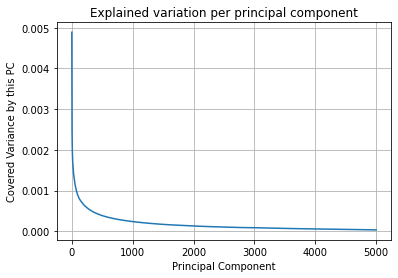

Explained variation per principal component for the last 1000 PCs: 
[5.96251046e-05 5.96026780e-05 5.95740151e-05 5.95392446e-05
 5.95185158e-05 5.94934076e-05 5.94799204e-05 5.94399887e-05
 5.94188350e-05 5.94008163e-05 5.93781778e-05 5.93703954e-05
 5.93372893e-05 5.93302005e-05 5.93007878e-05 5.92767183e-05
 5.92638284e-05 5.92496186e-05 5.92367416e-05 5.92228012e-05
 5.91630917e-05 5.91295839e-05 5.91192712e-05 5.91067554e-05
 5.90658136e-05 5.90492933e-05 5.90220379e-05 5.90040501e-05
 5.89699944e-05 5.89555089e-05 5.89181015e-05 5.88923140e-05
 5.88687638e-05 5.88546596e-05 5.88339660e-05 5.87959531e-05
 5.87709026e-05 5.87511515e-05 5.87432224e-05 5.87327121e-05
 5.87049866e-05 5.86757759e-05 5.86481764e-05 5.86262569e-05
 5.85990673e-05 5.85841809e-05 5.85676362e-05 5.85527739e-05
 5.85109415e-05 5.84720741e-05 5.84570300e-05 5.84467281e-05
 5.84326158e-05 5.84086659e-05 5.83876715e-05 5.83591801e-05
 5.83307974e-05 5.82924334e-05 5.82654526e-05 5.82514002e-05
 5.82324086e-05 5

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5000)
principalComponents = pca.fit_transform(df1)

vis_list(pca.explained_variance_ratio_,\
         "Explained variation per principal component",\
         'Covered Variance by this PC', 'Principal Component')

print('Explained variation per principal component for the last 1000 PCs: \n{}'\
      .format(pca.explained_variance_ratio_[4000:]))

#### best component num = 5000, create dataframe from pca output on tfidf of text. we have trade off between performance and ram limitation. we select 5000 pc component.

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5000)
pca.fit(df1)
columns = ['text_pca_%i' % i for i in range(5000)]
df1_pca = pd.DataFrame(pca.transform(df1), columns=columns, index=df1.index)
df1_pca.head()

,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,text_pca_35,text_pca_36,text_pca_37,text_pca_38,text_pca_39,...,text_pca_4960,text_pca_4961,text_pca_4962,text_pca_4963,text_pca_4964,text_pca_4965,text_pca_4966,text_pca_4967,text_pca_4968,text_pca_4969,text_pca_4970,text_pca_4971,text_pca_4972,text_pca_4973,text_pca_4974,text_pca_4975,text_pca_4976,text_pca_4977,text_pca_4978,text_pca_4979,text_pca_4980,text_pca_4981,text_pca_4982,text_pca_4983,text_pca_4984,text_pca_4985,text_pca_4986,text_pca_4987,text_pca_4988,text_pca_4989,text_pca_4990,text_pca_4991,text_pca_4992,text_pca_4993,text_pca_4994,text_pca_4995,text_pca_4996,text_pca_4997,text_pca_4998,text_pca_4999
0,-0.034620,0.006653,-0.018211,-0.004179,-0.004266,-0.046912,0.019016,-0.029552,-0.003512,0.009740,0.021383,-0.034159,-0.005136,-0.031664,0.039836,0.002303,0.021091,-0.024239,-0.021298,-0.016050,0.017142,-0.008043,0.029007,0.008088,0.000257,0.021103,0.002443,0.010802,-0.019662,0.024719,0.005248,-0.005749,-0.022194,-0.010973,0.015166,0.035125,-0.003311,-0.015418,-0.013799,0.017007,...,-0.015091,0.002368,-0.011087,-0.003225,-0.003047,-0.007277,-0.007330,0.002386,-0.002059,-0.003947,-0.004627,0.000266,-0.009993,-0.005423,0.006248,-0.001863,0.017158,-0.000609,0.004808,-0.012847,0.003081,0.004581,0.011099,0.000343,0.005795,0.004800,-0.004193,0.005040,-0.014262,-0.008681,0.019190,0.003955,-0.002109,-0.001477,0.009313,-0.004647,0.001093,-0.005127,0.003470,-0.001072
1,0.210133,-0.092681,0.067411,-0.006673,-0.016537,0.009831,-0.024324,0.006184,0.007922,-0.018377,-0.031624,-0.034120,0.011922,-0.000740,-0.023885,-0.003326,-0.004994,-0.013213,0.018494,0.010513,0.013235,-0.029477,-0.007130,0.011224,-0.054421,0.049663,0.005464,-0.033186,0.025253,0.011095,0.011604,-0.012498,-0.051798,-0.050491,0.037928,-0.030844,-0.017133,0.002307,0.003577,0.008341,...,0.001142,-0.003186,0.000071,0.005817,0.000510,0.000364,-0.000210,0.004281,0.003628,-0.000713,-0.003476,-0.003408,0.000738,0.002797,0.000644,0.002083,0.001157,0.001084,0.001053,0.002952,0.002757,-0.004624,0.005262,0.002201,-0.002856,0.004024,-0.002491,-0.002449,0.005861,0.001379,-0.002681,-0.002407,-0.004405,-0.000468,0.000488,0.001695,-0.000436,0.001683,0.001773,-0.001240
2,-0.039413,-0.030271,-0.004540,-0.017507,0.079032,0.012803,-0.044527,0.040972,-0.019480,-0.014999,-0.001610,-0.004382,-0.032064,-0.014701,-0.011795,-0.004853,-0.006703,0.017062,-0.012687,-0.018472,-0.028919,0.027485,-0.025541,-0.061978,-0.003129,-0.023225,0.082407,0.009014,0.061012,0.049621,0.037265,0.050850,0.037673,0.000053,0.036250,-0.023719,-0.034043,0.035903,0.010042,-0.059371,...,-0.000545,0.001494,-0.004401,-0.001311,-0.001148,-0.005568,-0.004288,0.000696,0.002005,0.002460,-0.006833,0.002403,0.000117,-0.003875,0.001424,0.002650,-0.000617,-0.002915,-0.004467,-0.002218,0.000834,0.001037,-0.004424,0.004011,0.000855,-0.002494,-0.001272,0.004883,-0.001205,0.002709,-0.000983,0.004146,0.003017,0.001993,0.000275,0.010153,-0.003882,0.004090,0.003040,0.003358
3,-0.031128,-0.008671,0.019014,-0.026376,-0.014568,0.022570,-0.005236,0.033658,0.018823,0.005045,-0.018751,0.013158,-0.010038,-0.014082,0.003819,0.010598,-0.004565,-0.000798,-0.012562,0.009553,-0.008640,-0.010299,-0.012468,0.011125,-0.019276,-0.016774,0.017562,0.011386,-0.014080,0.013567,-0.014402,0.009982,-0.017119,0.014060,0.008370,0.015658,-0.013930,-0.008821,-0.004301,0.002488,...,-0.000803,-0.002244,-0.005211,-0.001850,-0.004296,0.001551,0.004441,-0.006115,0.000941,-0.000262,-0.000341,0.003107,-0.001502,-0.001170,0.005945,-0.005436,-0.001126,0.005965,-0.001879,0.002183,-0.004272,-0.000836,-0.007759,0.001712,-0.007547,-0.001397,-0.003068,-0.000907,0.0030

In [68]:
pca.transform(eval1)
columns = ['text_pca_%i' % i for i in range(5000)]
eval1_pca = pd.DataFrame(pca.transform(eval1), columns=columns, index=eval1.index)
eval1_pca.head()

,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,text_pca_35,text_pca_36,text_pca_37,text_pca_38,text_pca_39,...,text_pca_4960,text_pca_4961,text_pca_4962,text_pca_4963,text_pca_4964,text_pca_4965,text_pca_4966,text_pca_4967,text_pca_4968,text_pca_4969,text_pca_4970,text_pca_4971,text_pca_4972,text_pca_4973,text_pca_4974,text_pca_4975,text_pca_4976,text_pca_4977,text_pca_4978,text_pca_4979,text_pca_4980,text_pca_4981,text_pca_4982,text_pca_4983,text_pca_4984,text_pca_4985,text_pca_4986,text_pca_4987,text_pca_4988,text_pca_4989,text_pca_4990,text_pca_4991,text_pca_4992,text_pca_4993,text_pca_4994,text_pca_4995,text_pca_4996,text_pca_4997,text_pca_4998,text_pca_4999
0,-0.053650,-0.021102,0.028514,-0.024210,-0.005718,0.022934,-0.004279,0.007368,-0.009014,0.007480,-0.013491,-0.011183,0.023973,0.002165,-0.002981,-0.014580,0.000678,-0.000406,0.000183,-0.001742,0.008749,-0.000162,-0.002037,0.004397,0.005857,0.013646,-0.005340,-0.009648,-0.003196,0.002360,0.009992,-0.005635,-0.011034,0.001656,-0.006841,-0.001263,-0.003380,-0.005855,0.009790,-0.006314,...,-0.000502,-0.005787,-0.000217,0.006051,-0.001322,-0.006257,-0.002989,-0.000690,-0.000730,0.003572,-0.006999,0.000680,-0.002873,-0.001558,-0.000520,-0.003912,0.004643,0.002611,0.006110,0.003610,-0.005740,-0.000286,0.008672,0.000355,-0.001022,0.002318,-0.005635,0.009639,-0.014261,0.005641,0.003905,0.004141,-0.004844,0.005514,-0.001621,0.001219,0.003959,0.011191,-0.000348,-0.002751
1,-0.026807,0.038676,-0.060852,0.034337,0.025020,0.020465,0.027865,0.044210,0.042830,-0.043581,-0.012619,0.007152,-0.061352,-0.062127,0.067900,-0.062824,0.049125,-0.055927,-0.030547,-0.038764,0.034812,0.002071,-0.009739,-0.046157,-0.102119,0.059863,-0.016182,-0.031404,-0.058032,0.052915,-0.110354,0.009270,0.058989,0.085138,0.016111,0.049156,-0.050098,0.022875,0.050766,0.013330,...,0.004449,0.003377,-0.005817,-0.000825,-0.006235,-0.008353,-0.002879,0.005812,-0.000269,0.006007,0.007681,0.001694,-0.000869,0.001362,-0.003169,0.000503,0.003932,0.000839,0.006007,0.001228,0.002322,0.009965,0.000625,-0.006679,-0.000009,0.000433,-0.003103,-0.000674,-0.005983,0.009733,0.002306,-0.008571,0.007187,0.002796,-0.002096,-0.001887,0.000777,-0.007126,-0.003533,-0.010039
2,0.048127,-0.029567,0.001532,-0.000108,-0.009619,0.014354,-0.023253,0.016106,-0.014728,0.025599,-0.022149,-0.015604,0.022466,-0.011148,-0.018366,-0.023641,-0.001559,0.000818,0.007947,-0.017539,-0.010911,-0.002323,-0.011876,-0.016086,-0.011051,-0.027785,0.013300,-0.019530,0.050707,0.048393,-0.008102,-0.054558,-0.018084,0.016723,-0.034774,0.002725,0.002367,0.006400,-0.010527,0.004939,...,0.000896,-0.005904,0.004589,-0.006733,-0.009989,0.002027,0.000414,-0.008958,-0.003706,-0.003068,0.005608,-0.001780,0.002882,0.002469,-0.003264,0.000367,-0.002377,0.009444,-0.011582,-0.000347,0.005033,0.005085,0.001652,0.003011,-0.004432,0.000708,-0.001075,0.001277,-0.000470,-0.000619,0.005445,0.000824,0.002263,-0.006022,0.005233,0.004821,-0.005746,-0.000447,0.007177,-0.005686
3,-0.043580,-0.011422,-0.002983,0.003872,-0.008380,-0.006681,-0.020474,-0.010630,0.021713,-0.010903,-0.003482,-0.014832,-0.017005,-0.030862,-0.023372,0.008186,0.014703,-0.006634,-0.006143,0.016872,-0.030502,-0.001569,-0.005049,-0.024378,-0.019441,0.004833,0.033416,-0.008106,-0.002599,0.016704,0.016916,-0.022063,0.040404,0.009600,0.001342,0.034678,-0.001902,0.025266,-0.003898,-0.058847,...,-0.002553,0.000438,-0.001387,0.000405,-0.007755,0.013617,-0.003657,-0.002022,-0.013542,-0.004181,-0.001235,-0.006069,-0.012503,-0.013494,0.002517,-0.003438,-0.000515,0.005009,-0.000202,-0.003375,0.002139,0.002699,-0.001890,-0.006167,0.003829,-0.005695,0.006014,0.006170

In [ ]:
# df1_pca = df1

In [69]:
df.drop(['text','title_fa','description_fa'], axis=1, inplace=True)
df = pd.concat([df, df1_pca], axis=1)
df.head()

,age_rating,country_fa,production_year,duration,genre,image,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,...,text_pca_4960,text_pca_4961,text_pca_4962,text_pca_4963,text_pca_4964,text_pca_4965,text_pca_4966,text_pca_4967,text_pca_4968,text_pca_4969,text_pca_4970,text_pca_4971,text_pca_4972,text_pca_4973,text_pca_4974,text_pca_4975,text_pca_4976,text_pca_4977,text_pca_4978,text_pca_4979,text_pca_4980,text_pca_4981,text_pca_4982,text_pca_4983,text_pca_4984,text_pca_4985,text_pca_4986,text_pca_4987,text_pca_4988,text_pca_4989,text_pca_4990,text_pca_4991,text_pca_4992,text_pca_4993,text_pca_4994,text_pca_4995,text_pca_4996,text_pca_4997,text_pca_4998,text_pca_4999
0,0.0,ایران,1994.0,5242.0,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,-0.034620,0.006653,-0.018211,-0.004179,-0.004266,-0.046912,0.019016,-0.029552,-0.003512,0.009740,0.021383,-0.034159,-0.005136,-0.031664,0.039836,0.002303,0.021091,-0.024239,-0.021298,-0.016050,0.017142,-0.008043,0.029007,0.008088,0.000257,0.021103,0.002443,0.010802,-0.019662,0.024719,0.005248,-0.005749,-0.022194,-0.010973,...,-0.015091,0.002368,-0.011087,-0.003225,-0.003047,-0.007277,-0.007330,0.002386,-0.002059,-0.003947,-0.004627,0.000266,-0.009993,-0.005423,0.006248,-0.001863,0.017158,-0.000609,0.004808,-0.012847,0.003081,0.004581,0.011099,0.000343,0.005795,0.004800,-0.004193,0.005040,-0.014262,-0.008681,0.019190,0.003955,-0.002109,-0.001477,0.009313,-0.004647,0.001093,-0.005127,0.003470,-0.001072
1,17.0,انگلستان,2018.0,6360.0,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,0.210133,-0.092681,0.067411,-0.006673,-0.016537,0.009831,-0.024324,0.006184,0.007922,-0.018377,-0.031624,-0.034120,0.011922,-0.000740,-0.023885,-0.003326,-0.004994,-0.013213,0.018494,0.010513,0.013235,-0.029477,-0.007130,0.011224,-0.054421,0.049663,0.005464,-0.033186,0.025253,0.011095,0.011604,-0.012498,-0.051798,-0.050491,...,0.001142,-0.003186,0.000071,0.005817,0.000510,0.000364,-0.000210,0.004281,0.003628,-0.000713,-0.003476,-0.003408,0.000738,0.002797,0.000644,0.002083,0.001157,0.001084,0.001053,0.002952,0.002757,-0.004624,0.005262,0.002201,-0.002856,0.004024,-0.002491,-0.002449,0.005861,0.001379,-0.002681,-0.002407,-0.004405,-0.000468,0.000488,0.001695,-0.000436,0.001683,0.001773,-0.001240
2,0.0,آمریکا,2017.0,6660.0,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,-0.039413,-0.030271,-0.004540,-0.017507,0.079032,0.012803,-0.044527,0.040972,-0.019480,-0.014999,-0.001610,-0.004382,-0.032064,-0.014701,-0.011795,-0.004853,-0.006703,0.017062,-0.012687,-0.018472,-0.028919,0.027485,-0.025541,-0.061978,-0.003129,-0.023225,0.082407,0.009014,0.061012,0.049621,0.037265,0.050850,0.037673,0.000053,...,-0.000545,0.001494,-0.004401,-0.001311,-0.001148,-0.005568,-0.004288,0.000696,0.002005,0.002460,-0.006833,0.002403,0.000117,-0.003875,0.001424,0.002650,-0.000617,-0.002915,-0.004467,-0.002218,0.000834,0.001037,-0.004424,0.004011,0.000855,-0.002494,-0.001272,0.004883,-0.001205,0.002709,-0.000983,0.004146,0.003017,0.001993,0.000275,0.010153,-0.003882,0.004090,0.003040,0.003358
3,7.0,آمریکا,2017.0,5347.0,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,-0.031128,-0.008671,0.019014,-0.026376,-0.014568,0.022570,-0.005236,0.033658,0.018823,0.005045,-0.018751,0.013158,-0.010038,-0.014082,0.003819,0.010598,-0.004565,-0.000798,-0.012562,0.009553,-0.008640,-0.010299,-0.012468,0.011125,-0.019276,-0.016774,0.017562,0.011386,-0.014080,0.013567,-0.014402,0.009982,-0.017119,0.014060,...,-0.000803,-0.002244,-0.005211,-0.001850,-0.004296,0.001551,0.004441,-0.006115,0.000941,-0.000262,-0.000341,0.003107,-0.001502,-0.001170,0.005945,-0.005436,-0.001126,0.005965,-0.001879,0.

In [70]:
eval.drop(['text','title_fa','description_fa'], axis=1, inplace=True)
eval = pd.concat([eval, eval1_pca], axis=1)
eval.head()

,age_rating,country_fa,production_year,duration,image,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,...,text_pca_4960,text_pca_4961,text_pca_4962,text_pca_4963,text_pca_4964,text_pca_4965,text_pca_4966,text_pca_4967,text_pca_4968,text_pca_4969,text_pca_4970,text_pca_4971,text_pca_4972,text_pca_4973,text_pca_4974,text_pca_4975,text_pca_4976,text_pca_4977,text_pca_4978,text_pca_4979,text_pca_4980,text_pca_4981,text_pca_4982,text_pca_4983,text_pca_4984,text_pca_4985,text_pca_4986,text_pca_4987,text_pca_4988,text_pca_4989,text_pca_4990,text_pca_4991,text_pca_4992,text_pca_4993,text_pca_4994,text_pca_4995,text_pca_4996,text_pca_4997,text_pca_4998,text_pca_4999
0,17.0,آمریکا,2014.0,6609.00,videos_covers_921fbbc1-0d58-4378-8e5b-92193edf...,-0.053650,-0.021102,0.028514,-0.024210,-0.005718,0.022934,-0.004279,0.007368,-0.009014,0.007480,-0.013491,-0.011183,0.023973,0.002165,-0.002981,-0.014580,0.000678,-0.000406,0.000183,-0.001742,0.008749,-0.000162,-0.002037,0.004397,0.005857,0.013646,-0.005340,-0.009648,-0.003196,0.002360,0.009992,-0.005635,-0.011034,0.001656,-0.006841,...,-0.000502,-0.005787,-0.000217,0.006051,-0.001322,-0.006257,-0.002989,-0.000690,-0.000730,0.003572,-0.006999,0.000680,-0.002873,-0.001558,-0.000520,-0.003912,0.004643,0.002611,0.006110,0.003610,-0.005740,-0.000286,0.008672,0.000355,-0.001022,0.002318,-0.005635,0.009639,-0.014261,0.005641,0.003905,0.004141,-0.004844,0.005514,-0.001621,0.001219,0.003959,0.011191,-0.000348,-0.002751
1,7.0,کانادا,2003.0,4018.85,videos_covers_f27599fe-0d9a-47ce-b796-997b2429...,-0.026807,0.038676,-0.060852,0.034337,0.025020,0.020465,0.027865,0.044210,0.042830,-0.043581,-0.012619,0.007152,-0.061352,-0.062127,0.067900,-0.062824,0.049125,-0.055927,-0.030547,-0.038764,0.034812,0.002071,-0.009739,-0.046157,-0.102119,0.059863,-0.016182,-0.031404,-0.058032,0.052915,-0.110354,0.009270,0.058989,0.085138,0.016111,...,0.004449,0.003377,-0.005817,-0.000825,-0.006235,-0.008353,-0.002879,0.005812,-0.000269,0.006007,0.007681,0.001694,-0.000869,0.001362,-0.003169,0.000503,0.003932,0.000839,0.006007,0.001228,0.002322,0.009965,0.000625,-0.006679,-0.000009,0.000433,-0.003103,-0.000674,-0.005983,0.009733,0.002306,-0.008571,0.007187,0.002796,-0.002096,-0.001887,0.000777,-0.007126,-0.003533,-0.010039
2,13.0,ایران,2018.0,4755.00,videos_covers_589607ad-e02f-443f-91f7-ac6c2388...,0.048127,-0.029567,0.001532,-0.000108,-0.009619,0.014354,-0.023253,0.016106,-0.014728,0.025599,-0.022149,-0.015604,0.022466,-0.011148,-0.018366,-0.023641,-0.001559,0.000818,0.007947,-0.017539,-0.010911,-0.002323,-0.011876,-0.016086,-0.011051,-0.027785,0.013300,-0.019530,0.050707,0.048393,-0.008102,-0.054558,-0.018084,0.016723,-0.034774,...,0.000896,-0.005904,0.004589,-0.006733,-0.009989,0.002027,0.000414,-0.008958,-0.003706,-0.003068,0.005608,-0.001780,0.002882,0.002469,-0.003264,0.000367,-0.002377,0.009444,-0.011582,-0.000347,0.005033,0.005085,0.001652,0.003011,-0.004432,0.000708,-0.001075,0.001277,-0.000470,-0.000619,0.005445,0.000824,0.002263,-0.006022,0.005233,0.004821,-0.005746,-0.000447,0.007177,-0.005686
3,7.0,ژاپن,2003.0,5340.00,videos_covers_08cff5a5-0b18-4df5-ac8d-02744a74...,-0.043580,-0.011422,-0.002983,0.003872,-0.008380,-0.006681,-0.020474,-0.010630,0.021713,-0.010903,-0.003482,-0.014832,-0.017005,-0.030862,-0.023372,0.008186,0.014703,-0.006634,-0.006143,0.016872,-0.030502,-0.001569,-0.005049,-0.024378,-0.019441,0.004833,0.033416,-0.008106,-0.002599,0.016704,0.016916,-0.022063,0.040404,0.009600,0.001342,...,-0.002553,0.000438,-0.001387,0.000405,-0.007755,0.013617,-0.003657,-0.002022,-0.013542,-0.004181,-0.001235,-0.006069,-0.012503,-0.013494,0.002517,-0.003438,-0.000

### extract mean colors

In [71]:
import cv2

def image_avr(name):
  myimg = cv2.imread(name)
  avg_color_per_row = np.average(myimg, axis=0)
  avg_color = np.average(avg_color_per_row, axis=0)
  return avg_color.tolist()

color_features = [image_avr('/content/train_set/'+i) for i in list(df['image'])]
columns = ['color_%i' % i for i in range(3)]
df2_color = pd.DataFrame(color_features, columns=columns, index=df.index)
df2_color.head()

,color_0,color_1,color_2
0,66.729775,80.012490,100.685039
1,72.137314,123.613569,139.347333
2,103.412216,105.983392,109.214284
3,73.345843,93.155716,87.995539
4,105.507804,117.713059,87.042324


In [72]:
df = pd.concat([df, df2_color], axis=1)
df.head()

,age_rating,country_fa,production_year,duration,genre,image,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,...,text_pca_4963,text_pca_4964,text_pca_4965,text_pca_4966,text_pca_4967,text_pca_4968,text_pca_4969,text_pca_4970,text_pca_4971,text_pca_4972,text_pca_4973,text_pca_4974,text_pca_4975,text_pca_4976,text_pca_4977,text_pca_4978,text_pca_4979,text_pca_4980,text_pca_4981,text_pca_4982,text_pca_4983,text_pca_4984,text_pca_4985,text_pca_4986,text_pca_4987,text_pca_4988,text_pca_4989,text_pca_4990,text_pca_4991,text_pca_4992,text_pca_4993,text_pca_4994,text_pca_4995,text_pca_4996,text_pca_4997,text_pca_4998,text_pca_4999,color_0,color_1,color_2
0,0.0,ایران,1994.0,5242.0,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,-0.034620,0.006653,-0.018211,-0.004179,-0.004266,-0.046912,0.019016,-0.029552,-0.003512,0.009740,0.021383,-0.034159,-0.005136,-0.031664,0.039836,0.002303,0.021091,-0.024239,-0.021298,-0.016050,0.017142,-0.008043,0.029007,0.008088,0.000257,0.021103,0.002443,0.010802,-0.019662,0.024719,0.005248,-0.005749,-0.022194,-0.010973,...,-0.003225,-0.003047,-0.007277,-0.007330,0.002386,-0.002059,-0.003947,-0.004627,0.000266,-0.009993,-0.005423,0.006248,-0.001863,0.017158,-0.000609,0.004808,-0.012847,0.003081,0.004581,0.011099,0.000343,0.005795,0.004800,-0.004193,0.005040,-0.014262,-0.008681,0.019190,0.003955,-0.002109,-0.001477,0.009313,-0.004647,0.001093,-0.005127,0.003470,-0.001072,66.729775,80.012490,100.685039
1,17.0,انگلستان,2018.0,6360.0,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,0.210133,-0.092681,0.067411,-0.006673,-0.016537,0.009831,-0.024324,0.006184,0.007922,-0.018377,-0.031624,-0.034120,0.011922,-0.000740,-0.023885,-0.003326,-0.004994,-0.013213,0.018494,0.010513,0.013235,-0.029477,-0.007130,0.011224,-0.054421,0.049663,0.005464,-0.033186,0.025253,0.011095,0.011604,-0.012498,-0.051798,-0.050491,...,0.005817,0.000510,0.000364,-0.000210,0.004281,0.003628,-0.000713,-0.003476,-0.003408,0.000738,0.002797,0.000644,0.002083,0.001157,0.001084,0.001053,0.002952,0.002757,-0.004624,0.005262,0.002201,-0.002856,0.004024,-0.002491,-0.002449,0.005861,0.001379,-0.002681,-0.002407,-0.004405,-0.000468,0.000488,0.001695,-0.000436,0.001683,0.001773,-0.001240,72.137314,123.613569,139.347333
2,0.0,آمریکا,2017.0,6660.0,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,-0.039413,-0.030271,-0.004540,-0.017507,0.079032,0.012803,-0.044527,0.040972,-0.019480,-0.014999,-0.001610,-0.004382,-0.032064,-0.014701,-0.011795,-0.004853,-0.006703,0.017062,-0.012687,-0.018472,-0.028919,0.027485,-0.025541,-0.061978,-0.003129,-0.023225,0.082407,0.009014,0.061012,0.049621,0.037265,0.050850,0.037673,0.000053,...,-0.001311,-0.001148,-0.005568,-0.004288,0.000696,0.002005,0.002460,-0.006833,0.002403,0.000117,-0.003875,0.001424,0.002650,-0.000617,-0.002915,-0.004467,-0.002218,0.000834,0.001037,-0.004424,0.004011,0.000855,-0.002494,-0.001272,0.004883,-0.001205,0.002709,-0.000983,0.004146,0.003017,0.001993,0.000275,0.010153,-0.003882,0.004090,0.003040,0.003358,103.412216,105.983392,109.214284
3,7.0,آمریکا,2017.0,5347.0,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,-0.031128,-0.008671,0.019014,-0.026376,-0.014568,0.022570,-0.005236,0.033658,0.018823,0.005045,-0.018751,0.013158,-0.010038,-0.014082,0.003819,0.010598,-0.004565,-0.000798,-0.012562,0.009553,-0.008640,-0.010299,-0.012468,0.011125,-0.019276,-0.016774,0.017562,0.011386,-0.014080,0.013567,-0.014402,0.009982,-0.017119,0.014060,...,-0.001850,-0.004296,0.001551,0.004441,-0.006115,0.000941,-0.000262,-0.000341,0.003107,-0.001502,-0.001170,0.005945,-0.005436,-0.001126,0.005965,-0.001879,0.002183,-0.004272,-0.000836,-0.007759,0

In [73]:
color_features = [image_avr('/content/eval_set/'+i) for i in list(eval['image'])]
columns = ['color_%i' % i for i in range(3)]
eval2_color = pd.DataFrame(color_features, columns=columns, index=eval.index)
eval2_color.head()

,color_0,color_1,color_2
0,81.632789,99.613900,105.198113
1,92.974794,131.089794,150.007529
2,130.961784,135.737118,159.552412
3,64.741892,66.003216,80.572608
4,41.413598,52.054775,78.822127


In [74]:
eval = pd.concat([eval, eval2_color], axis=1)
eval.head()

,age_rating,country_fa,production_year,duration,image,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,...,text_pca_4963,text_pca_4964,text_pca_4965,text_pca_4966,text_pca_4967,text_pca_4968,text_pca_4969,text_pca_4970,text_pca_4971,text_pca_4972,text_pca_4973,text_pca_4974,text_pca_4975,text_pca_4976,text_pca_4977,text_pca_4978,text_pca_4979,text_pca_4980,text_pca_4981,text_pca_4982,text_pca_4983,text_pca_4984,text_pca_4985,text_pca_4986,text_pca_4987,text_pca_4988,text_pca_4989,text_pca_4990,text_pca_4991,text_pca_4992,text_pca_4993,text_pca_4994,text_pca_4995,text_pca_4996,text_pca_4997,text_pca_4998,text_pca_4999,color_0,color_1,color_2
0,17.0,آمریکا,2014.0,6609.00,videos_covers_921fbbc1-0d58-4378-8e5b-92193edf...,-0.053650,-0.021102,0.028514,-0.024210,-0.005718,0.022934,-0.004279,0.007368,-0.009014,0.007480,-0.013491,-0.011183,0.023973,0.002165,-0.002981,-0.014580,0.000678,-0.000406,0.000183,-0.001742,0.008749,-0.000162,-0.002037,0.004397,0.005857,0.013646,-0.005340,-0.009648,-0.003196,0.002360,0.009992,-0.005635,-0.011034,0.001656,-0.006841,...,0.006051,-0.001322,-0.006257,-0.002989,-0.000690,-0.000730,0.003572,-0.006999,0.000680,-0.002873,-0.001558,-0.000520,-0.003912,0.004643,0.002611,0.006110,0.003610,-0.005740,-0.000286,0.008672,0.000355,-0.001022,0.002318,-0.005635,0.009639,-0.014261,0.005641,0.003905,0.004141,-0.004844,0.005514,-0.001621,0.001219,0.003959,0.011191,-0.000348,-0.002751,81.632789,99.613900,105.198113
1,7.0,کانادا,2003.0,4018.85,videos_covers_f27599fe-0d9a-47ce-b796-997b2429...,-0.026807,0.038676,-0.060852,0.034337,0.025020,0.020465,0.027865,0.044210,0.042830,-0.043581,-0.012619,0.007152,-0.061352,-0.062127,0.067900,-0.062824,0.049125,-0.055927,-0.030547,-0.038764,0.034812,0.002071,-0.009739,-0.046157,-0.102119,0.059863,-0.016182,-0.031404,-0.058032,0.052915,-0.110354,0.009270,0.058989,0.085138,0.016111,...,-0.000825,-0.006235,-0.008353,-0.002879,0.005812,-0.000269,0.006007,0.007681,0.001694,-0.000869,0.001362,-0.003169,0.000503,0.003932,0.000839,0.006007,0.001228,0.002322,0.009965,0.000625,-0.006679,-0.000009,0.000433,-0.003103,-0.000674,-0.005983,0.009733,0.002306,-0.008571,0.007187,0.002796,-0.002096,-0.001887,0.000777,-0.007126,-0.003533,-0.010039,92.974794,131.089794,150.007529
2,13.0,ایران,2018.0,4755.00,videos_covers_589607ad-e02f-443f-91f7-ac6c2388...,0.048127,-0.029567,0.001532,-0.000108,-0.009619,0.014354,-0.023253,0.016106,-0.014728,0.025599,-0.022149,-0.015604,0.022466,-0.011148,-0.018366,-0.023641,-0.001559,0.000818,0.007947,-0.017539,-0.010911,-0.002323,-0.011876,-0.016086,-0.011051,-0.027785,0.013300,-0.019530,0.050707,0.048393,-0.008102,-0.054558,-0.018084,0.016723,-0.034774,...,-0.006733,-0.009989,0.002027,0.000414,-0.008958,-0.003706,-0.003068,0.005608,-0.001780,0.002882,0.002469,-0.003264,0.000367,-0.002377,0.009444,-0.011582,-0.000347,0.005033,0.005085,0.001652,0.003011,-0.004432,0.000708,-0.001075,0.001277,-0.000470,-0.000619,0.005445,0.000824,0.002263,-0.006022,0.005233,0.004821,-0.005746,-0.000447,0.007177,-0.005686,130.961784,135.737118,159.552412
3,7.0,ژاپن,2003.0,5340.00,videos_covers_08cff5a5-0b18-4df5-ac8d-02744a74...,-0.043580,-0.011422,-0.002983,0.003872,-0.008380,-0.006681,-0.020474,-0.010630,0.021713,-0.010903,-0.003482,-0.014832,-0.017005,-0.030862,-0.023372,0.008186,0.014703,-0.006634,-0.006143,0.016872,-0.030502,-0.001569,-0.005049,-0.024378,-0.019441,0.004833,0.033416,-0.008106,-0.002599,0.016704,0.016916,-0.022063,0.040404,0.009600,0.001342,...,0.000405,-0.007755,0.013617,-0.003657,-0.002022,-0.013542,-0.004181,-0.001235,-0.006069,-0.012503,-0.013494,0.002517,-0.003438,-0.000515,0.005009,-0.000202,-0.003375,0.00

In [44]:
df.to_csv('before_sift.csv')

### use SIFT to covert image to numbric features, use codebook to image feature reduction

#### extract sift key points of images, 20 random key point from image

we have a trade off between ram limit and performance, we chose 20 keypoint to improve performance and Do not violate the ram limitation

Let's say an image has 3000 keypoints associated with it. The second line of code below will take in the training data image to produce 128-dimensional feature vectors for each keypoint (descriptors). The variable descriptors will contain all the descriptors for all the 3000 keypoints in the image being fed.
after we obtain all the feature descriptors from all keypoints in an image, we will need to select which feature descriptors we want. Let’s say I only want 20 feature descriptors, I will pick and keep 20 of them.


In [75]:
import cv2 as cv
from sklearn.cluster import MiniBatchKMeans

sift = cv2.xfeatures2d.SIFT_create()

dico = []

for i in list(df['image']):
    img = cv2.imread('/content/train_set/'+i)
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    des = des[np.random.randint(des.shape[0], size=20)]
    for d in des:
        dico.append(d)

print(len(dico))

220000


#### using kmeans to find 100 cluster of images' key point, generate codebook from Cluster centers, Vocabulary construction


After obtaining all 20 feature descriptors (processed keypoints) for ALL training images we will need to start building the vocabulary. The vocabulary is simply a set of feature descriptors that we check future images against to classify them correctly.
Lets’ say we have 100 training images and 20 feature descriptors for each training image. This means we have a total of 2000 feature descriptors (keypoints). We can define the vocabulary size to be of any number, 100 in this case.
The last line of code shows how we use clustering through k-means method to obtain the vocabulary of the required size.

In [76]:
from sklearn.cluster import KMeans

k = 100

kmeans = KMeans(n_clusters=k, random_state=0).fit(dico)

print('Cluster centers were found.')

Cluster centers were found.


#### create 100 feature from image, using histograms

We check the feature descriptors (keypoints) generated from each image against the vocabulary to determine how many of the 200 feature descriptors are present in this image. In other words, we need to assign each local feature to its nearest cluster center and build a histogram indicating how many times each cluster was used.

In [77]:
histo_list = []

for i in list(df['image']):
    img = cv2.imread('/content/train_set/'+i)
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    des = des[np.random.randint(des.shape[0], size=20)]

    histo = np.zeros(k)
    # nkp = np.size(kp)
    nkp = 20

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

    histo_list.append(histo)

np.array(histo_list).shape

(11000, 100)

In [78]:
columns = ['sift_%i' % i for i in range(100)]
df2_sift = pd.DataFrame(histo_list, columns=columns, index=df.index)
df2_sift.head()

,sift_0,sift_1,sift_2,sift_3,sift_4,sift_5,sift_6,sift_7,sift_8,sift_9,sift_10,sift_11,sift_12,sift_13,sift_14,sift_15,sift_16,sift_17,sift_18,sift_19,sift_20,sift_21,sift_22,sift_23,sift_24,sift_25,sift_26,sift_27,sift_28,sift_29,sift_30,sift_31,sift_32,sift_33,sift_34,sift_35,sift_36,sift_37,sift_38,sift_39,...,sift_60,sift_61,sift_62,sift_63,sift_64,sift_65,sift_66,sift_67,sift_68,sift_69,sift_70,sift_71,sift_72,sift_73,sift_74,sift_75,sift_76,sift_77,sift_78,sift_79,sift_80,sift_81,sift_82,sift_83,sift_84,sift_85,sift_86,sift_87,sift_88,sift_89,sift_90,sift_91,sift_92,sift_93,sift_94,sift_95,sift_96,sift_97,sift_98,sift_99
0,0.05,0.0,0.05,0.00,0.0,0.00,0.0,0.00,0.00,0.1,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.05,0.00,0.00,0.05,0.0,0.05,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.05,0.00,0.00,0.05,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.05,0.0,0.00,0.00,0.0,0.00,0.00,0.05,0.0,0.0,0.1,0.05,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.05,0.05,0.0,0.05,0.0,0.05,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.05
1,0.00,0.0,0.00,0.05,0.0,0.00,0.0,0.00,0.05,0.0,0.00,0.05,0.0,0.00,0.1,0.0,0.0,0.05,0.00,0.00,0.05,0.00,0.0,0.05,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.05,0.00,0.00,0.0,0.00,0.00,0.05,0.0,...,0.00,0.05,0.00,0.0,0.00,0.05,0.0,0.05,0.05,0.00,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.05,0.00,0.00,0.0,0.0,0.00
2,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.05,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.05,0.00,0.10,0.00,0.05,0.0,0.00,0.00,0.1,0.0,0.00,0.0,0.05,0.0,0.00,0.00,0.05,0.00,0.0,0.00,0.00,0.00,0.0,...,0.05,0.00,0.00,0.0,0.00,0.05,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.00,0.05,0.05,0.05,0.05,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.05,0.00,0.00,0.0,0.0,0.00
3,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.1,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.05,0.00,0.05,0.00,0.00,0.0,0.10,0.00,0.0,0.0,0.05,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.05,0.00,0.0,...,0.00,0.00,0.00,0.0,0.05,0.00,0.1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.05,0.05,0.00,0.00,0.00,0.00,0.0,0.05,0.0,0.00,0.0,0.05,0.0,0.0,0.0,0.00,0.05,0.00,0.0,0.0,0.00
4,0.00,0.0,0.00,0.00,0.0,0.05,0.0,0.00,0.05,0.0,0.05,0.00,0.0,0.05,0.0,0.0,0.0,0.00,0.05,0.05,0.00,0.10,0.0,0.15,0.05,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.05,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.05,0.0,0.00,0.00,0.00,0.1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.05,0.05,0.0,0.0,0.00


In [79]:
df = pd.concat([df, df2_sift], axis=1)
df.head()

,age_rating,country_fa,production_year,duration,genre,image,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,...,sift_60,sift_61,sift_62,sift_63,sift_64,sift_65,sift_66,sift_67,sift_68,sift_69,sift_70,sift_71,sift_72,sift_73,sift_74,sift_75,sift_76,sift_77,sift_78,sift_79,sift_80,sift_81,sift_82,sift_83,sift_84,sift_85,sift_86,sift_87,sift_88,sift_89,sift_90,sift_91,sift_92,sift_93,sift_94,sift_95,sift_96,sift_97,sift_98,sift_99
0,0.0,ایران,1994.0,5242.0,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,-0.034620,0.006653,-0.018211,-0.004179,-0.004266,-0.046912,0.019016,-0.029552,-0.003512,0.009740,0.021383,-0.034159,-0.005136,-0.031664,0.039836,0.002303,0.021091,-0.024239,-0.021298,-0.016050,0.017142,-0.008043,0.029007,0.008088,0.000257,0.021103,0.002443,0.010802,-0.019662,0.024719,0.005248,-0.005749,-0.022194,-0.010973,...,0.00,0.00,0.05,0.0,0.00,0.00,0.0,0.00,0.00,0.05,0.0,0.0,0.1,0.05,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.05,0.05,0.0,0.05,0.0,0.05,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.05
1,17.0,انگلستان,2018.0,6360.0,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,0.210133,-0.092681,0.067411,-0.006673,-0.016537,0.009831,-0.024324,0.006184,0.007922,-0.018377,-0.031624,-0.034120,0.011922,-0.000740,-0.023885,-0.003326,-0.004994,-0.013213,0.018494,0.010513,0.013235,-0.029477,-0.007130,0.011224,-0.054421,0.049663,0.005464,-0.033186,0.025253,0.011095,0.011604,-0.012498,-0.051798,-0.050491,...,0.00,0.05,0.00,0.0,0.00,0.05,0.0,0.05,0.05,0.00,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.05,0.00,0.00,0.0,0.0,0.00
2,0.0,آمریکا,2017.0,6660.0,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,-0.039413,-0.030271,-0.004540,-0.017507,0.079032,0.012803,-0.044527,0.040972,-0.019480,-0.014999,-0.001610,-0.004382,-0.032064,-0.014701,-0.011795,-0.004853,-0.006703,0.017062,-0.012687,-0.018472,-0.028919,0.027485,-0.025541,-0.061978,-0.003129,-0.023225,0.082407,0.009014,0.061012,0.049621,0.037265,0.050850,0.037673,0.000053,...,0.05,0.00,0.00,0.0,0.00,0.05,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.00,0.05,0.05,0.05,0.05,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.05,0.00,0.00,0.0,0.0,0.00
3,7.0,آمریکا,2017.0,5347.0,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,-0.031128,-0.008671,0.019014,-0.026376,-0.014568,0.022570,-0.005236,0.033658,0.018823,0.005045,-0.018751,0.013158,-0.010038,-0.014082,0.003819,0.010598,-0.004565,-0.000798,-0.012562,0.009553,-0.008640,-0.010299,-0.012468,0.011125,-0.019276,-0.016774,0.017562,0.011386,-0.014080,0.013567,-0.014402,0.009982,-0.017119,0.014060,...,0.00,0.00,0.00,0.0,0.05,0.00,0.1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.05,0.05,0.00,0.00,0.00,0.00,0.0,0.05,0.0,0.00,0.0,0.05,0.0,0.0,0.0,0.00,0.05,0.00,0.0,0.0,0.00
4,13.0,کانادا,2010.0,4080.0,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...,-0.023296,-0.003329,0.022415,-0.020370,-0.002215,0.017489,0.001393,0.028641,-0.003927,0.020832,-0.011143,0.004688,0.006603,-0.014005,0.007574,-0.005104,-0.007965,0.010497,0.001412,-0.008441,0.000570,-0.005843,0.004704,0.007947,-0.015091,0.013116,0.009459,-0.013399,0.013892,-0.004416,0.002600,-0.019176,-0.015496,-0.001596,...,0.00,0.00,0.00,0.0,0.00,0.05,0.0,0.00,0.00,0.00,0.1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.05,0.05,0.0,0.0,0.00


In [80]:
histo_list = []

for i in list(eval['image']):
    img = cv2.imread('/content/eval_set/'+i)
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    des = des[np.random.randint(des.shape[0], size=20)]

    histo = np.zeros(k)
    # nkp = np.size(kp)
    nkp = 20

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

    histo_list.append(histo)

np.array(histo_list).shape

(1554, 100)

In [81]:
columns = ['sift_%i' % i for i in range(100)]
eval2_sift = pd.DataFrame(histo_list, columns=columns, index=eval.index)
eval2_sift.head()

,sift_0,sift_1,sift_2,sift_3,sift_4,sift_5,sift_6,sift_7,sift_8,sift_9,sift_10,sift_11,sift_12,sift_13,sift_14,sift_15,sift_16,sift_17,sift_18,sift_19,sift_20,sift_21,sift_22,sift_23,sift_24,sift_25,sift_26,sift_27,sift_28,sift_29,sift_30,sift_31,sift_32,sift_33,sift_34,sift_35,sift_36,sift_37,sift_38,sift_39,...,sift_60,sift_61,sift_62,sift_63,sift_64,sift_65,sift_66,sift_67,sift_68,sift_69,sift_70,sift_71,sift_72,sift_73,sift_74,sift_75,sift_76,sift_77,sift_78,sift_79,sift_80,sift_81,sift_82,sift_83,sift_84,sift_85,sift_86,sift_87,sift_88,sift_89,sift_90,sift_91,sift_92,sift_93,sift_94,sift_95,sift_96,sift_97,sift_98,sift_99
0,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.05,0.00,0.00,0.00,0.05,0.05,0.00,0.0,0.0,0.05,0.0,0.00,0.00,0.0,0.0,0.05,0.0,0.00,0.00,0.0,...,0.05,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.05,0.1,0.0,0.00,0.0,0.05,0.0,0.00,0.00,0.00,0.0,0.00,0.05,0.0,0.0,0.05,0.0,0.05,0.00,0.05,0.00,0.05,0.00,0.05
1,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.05,0.0,0.00,0.00,0.1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.05,0.0,...,0.00,0.0,0.0,0.00,0.1,0.0,0.00,0.00,0.05,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.1,0.05,0.00,0.05,0.0,0.00,0.00,0.0,0.0,0.05,0.0,0.00,0.05,0.00,0.05,0.00,0.00,0.10
2,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.05,0.05,0.0,0.0,0.05,0.0,0.05,0.00,0.0,...,0.00,0.0,0.0,0.05,0.0,0.0,0.00,0.15,0.00,0.0,0.00,0.05,0.0,0.0,0.00,0.05,0.00,0.0,0.0,0.00,0.0,0.05,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.05,0.00,0.00,0.00,0.00,0.00
3,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.05,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.05,0.0,0.00,0.00,0.0,...,0.05,0.0,0.0,0.00,0.0,0.0,0.05,0.00,0.00,0.0,0.05,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.1,0.00,0.1,0.00,0.05,0.00,0.0,0.00,0.00,0.0,0.0,0.10,0.0,0.00,0.05,0.00,0.00,0.00,0.00,0.05
4,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.05,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.00,0.05,0.00,0.05,0.00,0.10,0.05,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.05,0.00,0.0,...,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.05,0.00,0.0,0.00,0.00,0.0,0.0,0.05,0.00,0.00,0.0,0.0,0.05,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.05,0.00,0.0,0.0,0.05,0.0,0.00,0.00,0.00,0.00,0.00,0.05,0.00


In [82]:
eval = pd.concat([eval, eval2_sift], axis=1)
eval.head()

,age_rating,country_fa,production_year,duration,image,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,...,sift_60,sift_61,sift_62,sift_63,sift_64,sift_65,sift_66,sift_67,sift_68,sift_69,sift_70,sift_71,sift_72,sift_73,sift_74,sift_75,sift_76,sift_77,sift_78,sift_79,sift_80,sift_81,sift_82,sift_83,sift_84,sift_85,sift_86,sift_87,sift_88,sift_89,sift_90,sift_91,sift_92,sift_93,sift_94,sift_95,sift_96,sift_97,sift_98,sift_99
0,17.0,آمریکا,2014.0,6609.00,videos_covers_921fbbc1-0d58-4378-8e5b-92193edf...,-0.053650,-0.021102,0.028514,-0.024210,-0.005718,0.022934,-0.004279,0.007368,-0.009014,0.007480,-0.013491,-0.011183,0.023973,0.002165,-0.002981,-0.014580,0.000678,-0.000406,0.000183,-0.001742,0.008749,-0.000162,-0.002037,0.004397,0.005857,0.013646,-0.005340,-0.009648,-0.003196,0.002360,0.009992,-0.005635,-0.011034,0.001656,-0.006841,...,0.05,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.05,0.1,0.0,0.00,0.0,0.05,0.0,0.00,0.00,0.00,0.0,0.00,0.05,0.0,0.0,0.05,0.0,0.05,0.00,0.05,0.00,0.05,0.00,0.05
1,7.0,کانادا,2003.0,4018.85,videos_covers_f27599fe-0d9a-47ce-b796-997b2429...,-0.026807,0.038676,-0.060852,0.034337,0.025020,0.020465,0.027865,0.044210,0.042830,-0.043581,-0.012619,0.007152,-0.061352,-0.062127,0.067900,-0.062824,0.049125,-0.055927,-0.030547,-0.038764,0.034812,0.002071,-0.009739,-0.046157,-0.102119,0.059863,-0.016182,-0.031404,-0.058032,0.052915,-0.110354,0.009270,0.058989,0.085138,0.016111,...,0.00,0.0,0.0,0.00,0.1,0.0,0.00,0.00,0.05,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.1,0.05,0.00,0.05,0.0,0.00,0.00,0.0,0.0,0.05,0.0,0.00,0.05,0.00,0.05,0.00,0.00,0.10
2,13.0,ایران,2018.0,4755.00,videos_covers_589607ad-e02f-443f-91f7-ac6c2388...,0.048127,-0.029567,0.001532,-0.000108,-0.009619,0.014354,-0.023253,0.016106,-0.014728,0.025599,-0.022149,-0.015604,0.022466,-0.011148,-0.018366,-0.023641,-0.001559,0.000818,0.007947,-0.017539,-0.010911,-0.002323,-0.011876,-0.016086,-0.011051,-0.027785,0.013300,-0.019530,0.050707,0.048393,-0.008102,-0.054558,-0.018084,0.016723,-0.034774,...,0.00,0.0,0.0,0.05,0.0,0.0,0.00,0.15,0.00,0.0,0.00,0.05,0.0,0.0,0.00,0.05,0.00,0.0,0.0,0.00,0.0,0.05,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.05,0.00,0.00,0.00,0.00,0.00
3,7.0,ژاپن,2003.0,5340.00,videos_covers_08cff5a5-0b18-4df5-ac8d-02744a74...,-0.043580,-0.011422,-0.002983,0.003872,-0.008380,-0.006681,-0.020474,-0.010630,0.021713,-0.010903,-0.003482,-0.014832,-0.017005,-0.030862,-0.023372,0.008186,0.014703,-0.006634,-0.006143,0.016872,-0.030502,-0.001569,-0.005049,-0.024378,-0.019441,0.004833,0.033416,-0.008106,-0.002599,0.016704,0.016916,-0.022063,0.040404,0.009600,0.001342,...,0.05,0.0,0.0,0.00,0.0,0.0,0.05,0.00,0.00,0.0,0.05,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.1,0.00,0.1,0.00,0.05,0.00,0.0,0.00,0.00,0.0,0.0,0.10,0.0,0.00,0.05,0.00,0.00,0.00,0.00,0.05
4,17.0,آمریکا,1983.0,4631.00,videos_covers_393f9008-f5fd-43cc-b222-4b28c060...,0.032018,-0.019683,-0.152355,0.105722,-0.015228,-0.029223,-0.035356,0.024228,-0.006485,0.169619,-0.080504,-0.042643,-0.105173,0.011692,-0.083115,-0.062531,-0.028932,-0.079322,0.041254,0.047690,0.054119,0.041497,0.016545,0.020762,-0.057526,-0.007215,-0.040024,0.025902,0.017886,-0.032906,0.048933,0.010039,0.015153,-0.022206,-0.067980,...,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.05,0.00,0.0,0.00,0.00,0.0,0.0,0.05,0.00,0.00,0.0,0.0,0.05,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.05,0.00,0.0,0.0,0.05,0.0,0.00,0.00,0.00,0.00,0.00,0.05,0.00


In [83]:
df.to_csv('train_after_sift.csv')
eval.to_csv('eval_after_sift.csv')

### use Big Transfer to convert image to vector

https://arxiv.org/pdf/1912.11370.pdf

In [51]:
# !pip install vectorhub[encoders-image-tfhub]

In [52]:
# from vectorhub.encoders.image.tfhub import BitMedium2Vec

# model = BitMedium2Vec()

# color_features = [model.encode(model.read('/content/train_set/'+i)) for i in list(df['image'])]
# columns = ['imvbitm_%i' % i for i in range(2048)]
# df2_imgfeature = pd.DataFrame(color_features, columns=columns, index=df.index)
# df2_imgfeature.head()


# # sample = model.read('/content/train_set/'+list(df['image'])[0])
# # vector = model.encode(sample)

In [53]:
# df = pd.concat([df, df2_imgfeature], axis=1)
# df.head()

### categorical features to numbric

#### country is nominal using one hot encoder

In [84]:
print('train set country: ',(set(list(df['country_fa']))))
print('eval set country: ',(set(list(eval['country_fa']))))
print('intersection of train and eval set country: ', (set(list(eval['country_fa'])).intersection(set(list(df['country_fa'])))))
print('union of train and eval set country: ', (set(list(eval['country_fa'])).union(set(list(df['country_fa'])))))

train set country:  {'هلند', 'جمهوری چک', 'برزیل', 'ایران', 'ایتالیا', 'مکزیک', 'چین', 'اتریش', 'ایسلند', 'ایرلند', 'انگلستان', 'امارات متحده عربی', 'شیلی', 'مالزی', 'آفریقای جنوبی', 'دانمارک', 'سوئد', 'افغانستان', 'استرالیا', 'مجارستان', 'آلمان', 'تایلند', 'سوییس', 'آمریکا', 'آرژانتین', 'کره جنوبی', 'اندونزی', 'اوکراین', 'نروژ', 'نیوزلند', 'هنگ کنگ', 'هند', 'کانادا', 'چکسلواکی', 'ویتنام', 'روسیه', 'آفریقای شمالی', 'تایوان', 'ترکیه', 'فرانسه', 'سنگاپور', 'فیلیپین', 'فنلاند', 'لهستان', 'پرو', 'بلژیک', 'مقدونیه', 'لوکزامبورگ', 'لبنان', 'غیره', 'ژاپن', 'اسپانیا'}
eval set country:  {'هلند', 'برزیل', 'ایران', 'ایتالیا', 'مکزیک', 'چین', 'لیتوانی', 'ایسلند', 'ایرلند', 'انگلستان', 'دانمارک', 'سوئد', 'استرالیا', 'مجارستان', 'سوییس', 'تایلند', 'آلمان', 'آمریکا', 'آرژانتین', 'کره جنوبی', 'نروژ', 'هنگ کنگ', 'هند', 'کانادا', 'روسیه', 'تایوان', 'ترکیه', 'فرانسه', 'فنلاند', 'لهستان', 'پرو', 'بلژیک', 'غیره', 'ژاپن', 'اسپانیا'}
intersection of train and eval set country:  {'هلند', 'برزیل', 'ایران', 'ا

In [85]:
acf = set(list(eval['country_fa'])).union(set(list(df['country_fa'])))
acf

{'آرژانتین',
 'آفریقای جنوبی',
 'آفریقای شمالی',
 'آلمان',
 'آمریکا',
 'اتریش',
 'استرالیا',
 'اسپانیا',
 'افغانستان',
 'امارات متحده عربی',
 'اندونزی',
 'انگلستان',
 'اوکراین',
 'ایتالیا',
 'ایران',
 'ایرلند',
 'ایسلند',
 'برزیل',
 'بلژیک',
 'تایلند',
 'تایوان',
 'ترکیه',
 'جمهوری چک',
 'دانمارک',
 'روسیه',
 'سنگاپور',
 'سوئد',
 'سوییس',
 'شیلی',
 'غیره',
 'فرانسه',
 'فنلاند',
 'فیلیپین',
 'لبنان',
 'لهستان',
 'لوکزامبورگ',
 'لیتوانی',
 'مالزی',
 'مجارستان',
 'مقدونیه',
 'مکزیک',
 'نروژ',
 'نیوزلند',
 'هلند',
 'هند',
 'هنگ کنگ',
 'ویتنام',
 'پرو',
 'چکسلواکی',
 'چین',
 'ژاپن',
 'کانادا',
 'کره جنوبی'}

In [88]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=acf, ordered=True)
eval['country_fa'] = eval['country_fa'].astype(cat_type)
eval= pd.get_dummies(eval, columns=['country_fa'], drop_first= True)

In [89]:
df['country_fa'] = df['country_fa'].astype(cat_type)
df= pd.get_dummies(df, columns=['country_fa'], drop_first= True)

In [90]:
eval.head()

,age_rating,production_year,duration,image,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,text_pca_35,...,country_fa_نروژ,country_fa_اوکراین,country_fa_نیوزلند,country_fa_هند,country_fa_کانادا,country_fa_چکسلواکی,country_fa_آفریقای شمالی,country_fa_فرانسه,country_fa_سنگاپور,country_fa_فیلیپین,country_fa_لهستان,country_fa_بلژیک,country_fa_لوکزامبورگ,country_fa_غیره,country_fa_ژاپن,country_fa_هلند,country_fa_جمهوری چک,country_fa_برزیل,country_fa_اتریش,country_fa_ایسلند,country_fa_ایرلند,country_fa_انگلستان,country_fa_مالزی,country_fa_افغانستان,country_fa_استرالیا,country_fa_مجارستان,country_fa_سوییس,country_fa_آمریکا,country_fa_آرژانتین,country_fa_کره جنوبی,country_fa_هنگ کنگ,country_fa_ویتنام,country_fa_روسیه,country_fa_تایوان,country_fa_ترکیه,country_fa_فنلاند,country_fa_پرو,country_fa_مقدونیه,country_fa_لبنان,country_fa_اسپانیا
0,17.0,2014.0,6609.00,videos_covers_921fbbc1-0d58-4378-8e5b-92193edf...,-0.053650,-0.021102,0.028514,-0.024210,-0.005718,0.022934,-0.004279,0.007368,-0.009014,0.007480,-0.013491,-0.011183,0.023973,0.002165,-0.002981,-0.014580,0.000678,-0.000406,0.000183,-0.001742,0.008749,-0.000162,-0.002037,0.004397,0.005857,0.013646,-0.005340,-0.009648,-0.003196,0.002360,0.009992,-0.005635,-0.011034,0.001656,-0.006841,-0.001263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,7.0,2003.0,4018.85,videos_covers_f27599fe-0d9a-47ce-b796-997b2429...,-0.026807,0.038676,-0.060852,0.034337,0.025020,0.020465,0.027865,0.044210,0.042830,-0.043581,-0.012619,0.007152,-0.061352,-0.062127,0.067900,-0.062824,0.049125,-0.055927,-0.030547,-0.038764,0.034812,0.002071,-0.009739,-0.046157,-0.102119,0.059863,-0.016182,-0.031404,-0.058032,0.052915,-0.110354,0.009270,0.058989,0.085138,0.016111,0.049156,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13.0,2018.0,4755.00,videos_covers_589607ad-e02f-443f-91f7-ac6c2388...,0.048127,-0.029567,0.001532,-0.000108,-0.009619,0.014354,-0.023253,0.016106,-0.014728,0.025599,-0.022149,-0.015604,0.022466,-0.011148,-0.018366,-0.023641,-0.001559,0.000818,0.007947,-0.017539,-0.010911,-0.002323,-0.011876,-0.016086,-0.011051,-0.027785,0.013300,-0.019530,0.050707,0.048393,-0.008102,-0.054558,-0.018084,0.016723,-0.034774,0.002725,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.0,2003.0,5340.00,videos_covers_08cff5a5-0b18-4df5-ac8d-02744a74...,-0.043580,-0.011422,-0.002983,0.003872,-0.008380,-0.006681,-0.020474,-0.010630,0.021713,-0.010903,-0.003482,-0.014832,-0.017005,-0.030862,-0.023372,0.008186,0.014703,-0.006634,-0.006143,0.016872,-0.030502,-0.001569,-0.005049,-0.024378,-0.019441,0.004833,0.033416,-0.008106,-0.002599,0.016704,0.016916,-0.022063,0.040404,0.009600,0.001342,0.034678,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,1983.0,4631.00,videos_covers_393f9008-f5fd-43cc-b222-4b28c060...,0.032018,-0.019683,-0.152355,0.105722,-0.015228,-0.029223,-0.035356,0.024228,-0.006485,0.169619,-0.080504,-0.042643,-0.105173,0.011692,-0.083115,-0.062531,-0.028932,-0.079322,0.041254,0.047690,0.054119,0.041497,0.016545,0.020762,-0.057526,-0.007215,-0.040024,0.025902,0.017886,-0.032906,0.048933,0.010039,0.015153,-0.022206,-0.067980,-0.039879,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
df.head()

,age_rating,production_year,duration,genre,image,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,...,country_fa_نروژ,country_fa_اوکراین,country_fa_نیوزلند,country_fa_هند,country_fa_کانادا,country_fa_چکسلواکی,country_fa_آفریقای شمالی,country_fa_فرانسه,country_fa_سنگاپور,country_fa_فیلیپین,country_fa_لهستان,country_fa_بلژیک,country_fa_لوکزامبورگ,country_fa_غیره,country_fa_ژاپن,country_fa_هلند,country_fa_جمهوری چک,country_fa_برزیل,country_fa_اتریش,country_fa_ایسلند,country_fa_ایرلند,country_fa_انگلستان,country_fa_مالزی,country_fa_افغانستان,country_fa_استرالیا,country_fa_مجارستان,country_fa_سوییس,country_fa_آمریکا,country_fa_آرژانتین,country_fa_کره جنوبی,country_fa_هنگ کنگ,country_fa_ویتنام,country_fa_روسیه,country_fa_تایوان,country_fa_ترکیه,country_fa_فنلاند,country_fa_پرو,country_fa_مقدونیه,country_fa_لبنان,country_fa_اسپانیا
0,0.0,1994.0,5242.0,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,-0.034620,0.006653,-0.018211,-0.004179,-0.004266,-0.046912,0.019016,-0.029552,-0.003512,0.009740,0.021383,-0.034159,-0.005136,-0.031664,0.039836,0.002303,0.021091,-0.024239,-0.021298,-0.016050,0.017142,-0.008043,0.029007,0.008088,0.000257,0.021103,0.002443,0.010802,-0.019662,0.024719,0.005248,-0.005749,-0.022194,-0.010973,0.015166,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17.0,2018.0,6360.0,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,0.210133,-0.092681,0.067411,-0.006673,-0.016537,0.009831,-0.024324,0.006184,0.007922,-0.018377,-0.031624,-0.034120,0.011922,-0.000740,-0.023885,-0.003326,-0.004994,-0.013213,0.018494,0.010513,0.013235,-0.029477,-0.007130,0.011224,-0.054421,0.049663,0.005464,-0.033186,0.025253,0.011095,0.011604,-0.012498,-0.051798,-0.050491,0.037928,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,2017.0,6660.0,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,-0.039413,-0.030271,-0.004540,-0.017507,0.079032,0.012803,-0.044527,0.040972,-0.019480,-0.014999,-0.001610,-0.004382,-0.032064,-0.014701,-0.011795,-0.004853,-0.006703,0.017062,-0.012687,-0.018472,-0.028919,0.027485,-0.025541,-0.061978,-0.003129,-0.023225,0.082407,0.009014,0.061012,0.049621,0.037265,0.050850,0.037673,0.000053,0.036250,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7.0,2017.0,5347.0,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,-0.031128,-0.008671,0.019014,-0.026376,-0.014568,0.022570,-0.005236,0.033658,0.018823,0.005045,-0.018751,0.013158,-0.010038,-0.014082,0.003819,0.010598,-0.004565,-0.000798,-0.012562,0.009553,-0.008640,-0.010299,-0.012468,0.011125,-0.019276,-0.016774,0.017562,0.011386,-0.014080,0.013567,-0.014402,0.009982,-0.017119,0.014060,0.008370,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13.0,2010.0,4080.0,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...,-0.023296,-0.003329,0.022415,-0.020370,-0.002215,0.017489,0.001393,0.028641,-0.003927,0.020832,-0.011143,0.004688,0.006603,-0.014005,0.007574,-0.005104,-0.007965,0.010497,0.001412,-0.008441,0.000570,-0.005843,0.004704,0.007947,-0.015091,0.013116,0.009459,-0.013399,0.013892,-0.004416,0.002600,-0.019176,-0.015496,-0.001596,-0.006104,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### genre is label, using replace

In [92]:
keys = list(set(list(df['genre'])))
values = range(len(keys))
dictionary = dict(zip(keys, values))
print(dictionary)
genre_map = {"genre": dictionary}
df = df.replace(genre_map)

{'comedy': 0, 'action': 1, 'social': 2, 'animation': 3, 'thriller': 4, 'family': 5, 'adventure': 6, 'drama': 7, 'documentary': 8, 'romance': 9}


In [93]:
df.head()

,age_rating,production_year,duration,genre,image,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,...,country_fa_نروژ,country_fa_اوکراین,country_fa_نیوزلند,country_fa_هند,country_fa_کانادا,country_fa_چکسلواکی,country_fa_آفریقای شمالی,country_fa_فرانسه,country_fa_سنگاپور,country_fa_فیلیپین,country_fa_لهستان,country_fa_بلژیک,country_fa_لوکزامبورگ,country_fa_غیره,country_fa_ژاپن,country_fa_هلند,country_fa_جمهوری چک,country_fa_برزیل,country_fa_اتریش,country_fa_ایسلند,country_fa_ایرلند,country_fa_انگلستان,country_fa_مالزی,country_fa_افغانستان,country_fa_استرالیا,country_fa_مجارستان,country_fa_سوییس,country_fa_آمریکا,country_fa_آرژانتین,country_fa_کره جنوبی,country_fa_هنگ کنگ,country_fa_ویتنام,country_fa_روسیه,country_fa_تایوان,country_fa_ترکیه,country_fa_فنلاند,country_fa_پرو,country_fa_مقدونیه,country_fa_لبنان,country_fa_اسپانیا
0,0.0,1994.0,5242.0,1,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,-0.034620,0.006653,-0.018211,-0.004179,-0.004266,-0.046912,0.019016,-0.029552,-0.003512,0.009740,0.021383,-0.034159,-0.005136,-0.031664,0.039836,0.002303,0.021091,-0.024239,-0.021298,-0.016050,0.017142,-0.008043,0.029007,0.008088,0.000257,0.021103,0.002443,0.010802,-0.019662,0.024719,0.005248,-0.005749,-0.022194,-0.010973,0.015166,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17.0,2018.0,6360.0,7,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,0.210133,-0.092681,0.067411,-0.006673,-0.016537,0.009831,-0.024324,0.006184,0.007922,-0.018377,-0.031624,-0.034120,0.011922,-0.000740,-0.023885,-0.003326,-0.004994,-0.013213,0.018494,0.010513,0.013235,-0.029477,-0.007130,0.011224,-0.054421,0.049663,0.005464,-0.033186,0.025253,0.011095,0.011604,-0.012498,-0.051798,-0.050491,0.037928,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,2017.0,6660.0,1,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,-0.039413,-0.030271,-0.004540,-0.017507,0.079032,0.012803,-0.044527,0.040972,-0.019480,-0.014999,-0.001610,-0.004382,-0.032064,-0.014701,-0.011795,-0.004853,-0.006703,0.017062,-0.012687,-0.018472,-0.028919,0.027485,-0.025541,-0.061978,-0.003129,-0.023225,0.082407,0.009014,0.061012,0.049621,0.037265,0.050850,0.037673,0.000053,0.036250,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7.0,2017.0,5347.0,6,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,-0.031128,-0.008671,0.019014,-0.026376,-0.014568,0.022570,-0.005236,0.033658,0.018823,0.005045,-0.018751,0.013158,-0.010038,-0.014082,0.003819,0.010598,-0.004565,-0.000798,-0.012562,0.009553,-0.008640,-0.010299,-0.012468,0.011125,-0.019276,-0.016774,0.017562,0.011386,-0.014080,0.013567,-0.014402,0.009982,-0.017119,0.014060,0.008370,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13.0,2010.0,4080.0,8,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...,-0.023296,-0.003329,0.022415,-0.020370,-0.002215,0.017489,0.001393,0.028641,-0.003927,0.020832,-0.011143,0.004688,0.006603,-0.014005,0.007574,-0.005104,-0.007965,0.010497,0.001412,-0.008441,0.000570,-0.005843,0.004704,0.007947,-0.015091,0.013116,0.009459,-0.013399,0.013892,-0.004416,0.002600,-0.019176,-0.015496,-0.001596,-0.006104,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
df.to_csv('clean_trainset.csv')
eval.to_csv('clean_evalset.csv')

In [122]:
# df = pd.read_csv('clean_trainset.csv', index_col=False)
# df = df.drop(['Unnamed: 0'], axis=1)
# df.head()

,age_rating,production_year,duration,genre,image,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,...,country_fa_اوکراین,country_fa_ایتالیا,country_fa_ایران,country_fa_ایرلند,country_fa_ایسلند,country_fa_برزیل,country_fa_بلژیک,country_fa_تایلند,country_fa_تایوان,country_fa_ترکیه,country_fa_جمهوری چک,country_fa_دانمارک,country_fa_روسیه,country_fa_سنگاپور,country_fa_سوئد,country_fa_سوییس,country_fa_شیلی,country_fa_غیره,country_fa_فرانسه,country_fa_فنلاند,country_fa_فیلیپین,country_fa_لبنان,country_fa_لهستان,country_fa_لوکزامبورگ,country_fa_مالزی,country_fa_مجارستان,country_fa_مقدونیه,country_fa_مکزیک,country_fa_نروژ,country_fa_نیوزلند,country_fa_هلند,country_fa_هند,country_fa_هنگ کنگ,country_fa_ویتنام,country_fa_پرو,country_fa_چکسلواکی,country_fa_چین,country_fa_ژاپن,country_fa_کانادا,country_fa_کره جنوبی
0,0.0,1994.0,5242.0,8,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,-0.034620,0.006653,-0.018211,-0.004179,-0.004266,-0.046912,0.019016,-0.029552,-0.003512,0.009740,0.021383,-0.034159,-0.005136,-0.031664,0.039836,0.002303,0.021091,-0.024239,-0.021298,-0.016050,0.017142,-0.008043,0.029007,0.008088,0.000257,0.021103,0.002443,0.010802,-0.019662,0.024719,0.005248,-0.005749,-0.022194,-0.010973,0.015166,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17.0,2018.0,6360.0,6,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,0.210133,-0.092681,0.067411,-0.006673,-0.016537,0.009831,-0.024324,0.006184,0.007922,-0.018377,-0.031624,-0.034120,0.011922,-0.000740,-0.023885,-0.003326,-0.004994,-0.013213,0.018494,0.010513,0.013235,-0.029477,-0.007130,0.011224,-0.054421,0.049663,0.005464,-0.033186,0.025253,0.011095,0.011604,-0.012498,-0.051798,-0.050491,0.037928,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,2017.0,6660.0,8,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,-0.039413,-0.030271,-0.004540,-0.017507,0.079032,0.012803,-0.044527,0.040972,-0.019480,-0.014999,-0.001610,-0.004382,-0.032064,-0.014701,-0.011795,-0.004853,-0.006703,0.017062,-0.012687,-0.018472,-0.028919,0.027485,-0.025541,-0.061978,-0.003129,-0.023225,0.082407,0.009014,0.061012,0.049621,0.037265,0.050850,0.037673,0.000053,0.036250,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.0,2017.0,5347.0,7,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,-0.031128,-0.008671,0.019014,-0.026376,-0.014568,0.022570,-0.005236,0.033658,0.018823,0.005045,-0.018751,0.013158,-0.010038,-0.014082,0.003819,0.010598,-0.004565,-0.000798,-0.012562,0.009553,-0.008640,-0.010299,-0.012468,0.011125,-0.019276,-0.016774,0.017562,0.011386,-0.014080,0.013567,-0.014402,0.009982,-0.017119,0.014060,0.008370,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13.0,2010.0,4080.0,9,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...,-0.023296,-0.003329,0.022415,-0.020370,-0.002215,0.017489,0.001393,0.028641,-0.003927,0.020832,-0.011143,0.004688,0.006603,-0.014005,0.007574,-0.005104,-0.007965,0.010497,0.001412,-0.008441,0.000570,-0.005843,0.004704,0.007947,-0.015091,0.013116,0.009459,-0.013399,0.013892,-0.004416,0.002600,-0.019176,-0.015496,-0.001596,-0.006104,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### define dataset(X) and label(y)

In [94]:
y = list(df['genre'])
x = df.drop(['genre', 'image'], axis=1)
x

,age_rating,production_year,duration,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,text_pca_35,text_pca_36,...,country_fa_نروژ,country_fa_اوکراین,country_fa_نیوزلند,country_fa_هند,country_fa_کانادا,country_fa_چکسلواکی,country_fa_آفریقای شمالی,country_fa_فرانسه,country_fa_سنگاپور,country_fa_فیلیپین,country_fa_لهستان,country_fa_بلژیک,country_fa_لوکزامبورگ,country_fa_غیره,country_fa_ژاپن,country_fa_هلند,country_fa_جمهوری چک,country_fa_برزیل,country_fa_اتریش,country_fa_ایسلند,country_fa_ایرلند,country_fa_انگلستان,country_fa_مالزی,country_fa_افغانستان,country_fa_استرالیا,country_fa_مجارستان,country_fa_سوییس,country_fa_آمریکا,country_fa_آرژانتین,country_fa_کره جنوبی,country_fa_هنگ کنگ,country_fa_ویتنام,country_fa_روسیه,country_fa_تایوان,country_fa_ترکیه,country_fa_فنلاند,country_fa_پرو,country_fa_مقدونیه,country_fa_لبنان,country_fa_اسپانیا
0,0.0,1994.0,5242.0,-0.034620,0.006653,-0.018211,-0.004179,-0.004266,-0.046912,0.019016,-0.029552,-0.003512,0.009740,0.021383,-0.034159,-0.005136,-0.031664,0.039836,0.002303,0.021091,-0.024239,-0.021298,-0.016050,0.017142,-0.008043,0.029007,0.008088,0.000257,0.021103,0.002443,0.010802,-0.019662,0.024719,0.005248,-0.005749,-0.022194,-0.010973,0.015166,0.035125,-0.003311,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17.0,2018.0,6360.0,0.210133,-0.092681,0.067411,-0.006673,-0.016537,0.009831,-0.024324,0.006184,0.007922,-0.018377,-0.031624,-0.034120,0.011922,-0.000740,-0.023885,-0.003326,-0.004994,-0.013213,0.018494,0.010513,0.013235,-0.029477,-0.007130,0.011224,-0.054421,0.049663,0.005464,-0.033186,0.025253,0.011095,0.011604,-0.012498,-0.051798,-0.050491,0.037928,-0.030844,-0.017133,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,2017.0,6660.0,-0.039413,-0.030271,-0.004540,-0.017507,0.079032,0.012803,-0.044527,0.040972,-0.019480,-0.014999,-0.001610,-0.004382,-0.032064,-0.014701,-0.011795,-0.004853,-0.006703,0.017062,-0.012687,-0.018472,-0.028919,0.027485,-0.025541,-0.061978,-0.003129,-0.023225,0.082407,0.009014,0.061012,0.049621,0.037265,0.050850,0.037673,0.000053,0.036250,-0.023719,-0.034043,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7.0,2017.0,5347.0,-0.031128,-0.008671,0.019014,-0.026376,-0.014568,0.022570,-0.005236,0.033658,0.018823,0.005045,-0.018751,0.013158,-0.010038,-0.014082,0.003819,0.010598,-0.004565,-0.000798,-0.012562,0.009553,-0.008640,-0.010299,-0.012468,0.011125,-0.019276,-0.016774,0.017562,0.011386,-0.014080,0.013567,-0.014402,0.009982,-0.017119,0.014060,0.008370,0.015658,-0.013930,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13.0,2010.0,4080.0,-0.023296,-0.003329,0.022415,-0.020370,-0.002215,0.017489,0.001393,0.028641,-0.003927,0.020832,-0.011143,0.004688,0.006603,-0.014005,0.007574,-0.005104,-0.007965,0.010497,0.001412,-0.008441,0.000570,-0.005843,0.004704,0.007947,-0.015091,0.013116,0.009459,-0.013399,0.013892,-0.004416,0.002600,-0.019176,-0.015496,-0.001596,-0.006104,-0.017620,-0.012682,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,13.0,1994.0,6426.0,-0.024773,-0.004190,-0.058836,0.031400,-0.024377,-0.018756,-0.013594,0.017044,-0.022120,0.035403,-0.008976,0.032958,-0.002913,0.022328,0.022682,0.0

In [95]:
evalx = eval.drop(['image'], axis=1)
evalx

,age_rating,production_year,duration,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,text_pca_35,text_pca_36,...,country_fa_نروژ,country_fa_اوکراین,country_fa_نیوزلند,country_fa_هند,country_fa_کانادا,country_fa_چکسلواکی,country_fa_آفریقای شمالی,country_fa_فرانسه,country_fa_سنگاپور,country_fa_فیلیپین,country_fa_لهستان,country_fa_بلژیک,country_fa_لوکزامبورگ,country_fa_غیره,country_fa_ژاپن,country_fa_هلند,country_fa_جمهوری چک,country_fa_برزیل,country_fa_اتریش,country_fa_ایسلند,country_fa_ایرلند,country_fa_انگلستان,country_fa_مالزی,country_fa_افغانستان,country_fa_استرالیا,country_fa_مجارستان,country_fa_سوییس,country_fa_آمریکا,country_fa_آرژانتین,country_fa_کره جنوبی,country_fa_هنگ کنگ,country_fa_ویتنام,country_fa_روسیه,country_fa_تایوان,country_fa_ترکیه,country_fa_فنلاند,country_fa_پرو,country_fa_مقدونیه,country_fa_لبنان,country_fa_اسپانیا
0,17.0,2014.0,6609.00,-0.053650,-0.021102,0.028514,-0.024210,-0.005718,0.022934,-0.004279,0.007368,-0.009014,0.007480,-0.013491,-0.011183,0.023973,0.002165,-0.002981,-0.014580,0.000678,-0.000406,0.000183,-0.001742,0.008749,-0.000162,-0.002037,0.004397,0.005857,0.013646,-0.005340,-0.009648,-0.003196,0.002360,0.009992,-0.005635,-0.011034,0.001656,-0.006841,-0.001263,-0.003380,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,7.0,2003.0,4018.85,-0.026807,0.038676,-0.060852,0.034337,0.025020,0.020465,0.027865,0.044210,0.042830,-0.043581,-0.012619,0.007152,-0.061352,-0.062127,0.067900,-0.062824,0.049125,-0.055927,-0.030547,-0.038764,0.034812,0.002071,-0.009739,-0.046157,-0.102119,0.059863,-0.016182,-0.031404,-0.058032,0.052915,-0.110354,0.009270,0.058989,0.085138,0.016111,0.049156,-0.050098,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13.0,2018.0,4755.00,0.048127,-0.029567,0.001532,-0.000108,-0.009619,0.014354,-0.023253,0.016106,-0.014728,0.025599,-0.022149,-0.015604,0.022466,-0.011148,-0.018366,-0.023641,-0.001559,0.000818,0.007947,-0.017539,-0.010911,-0.002323,-0.011876,-0.016086,-0.011051,-0.027785,0.013300,-0.019530,0.050707,0.048393,-0.008102,-0.054558,-0.018084,0.016723,-0.034774,0.002725,0.002367,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.0,2003.0,5340.00,-0.043580,-0.011422,-0.002983,0.003872,-0.008380,-0.006681,-0.020474,-0.010630,0.021713,-0.010903,-0.003482,-0.014832,-0.017005,-0.030862,-0.023372,0.008186,0.014703,-0.006634,-0.006143,0.016872,-0.030502,-0.001569,-0.005049,-0.024378,-0.019441,0.004833,0.033416,-0.008106,-0.002599,0.016704,0.016916,-0.022063,0.040404,0.009600,0.001342,0.034678,-0.001902,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,1983.0,4631.00,0.032018,-0.019683,-0.152355,0.105722,-0.015228,-0.029223,-0.035356,0.024228,-0.006485,0.169619,-0.080504,-0.042643,-0.105173,0.011692,-0.083115,-0.062531,-0.028932,-0.079322,0.041254,0.047690,0.054119,0.041497,0.016545,0.020762,-0.057526,-0.007215,-0.040024,0.025902,0.017886,-0.032906,0.048933,0.010039,0.015153,-0.022206,-0.067980,-0.039879,-0.009575,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,13.0,2016.0,4018.85,-0.045133,-0.027506,0.044457,-0.035570,-0.016208,0.022900,-0.002912,-0.005183,-0.041933,0.023815,0.145207,-0.014899,-0.034571,0.071229,0

### standard scale features

In [96]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
standard_x = ss.fit_transform(x)
x = pd.DataFrame(standard_x, index=x.index, columns=x.columns)
x

,age_rating,production_year,duration,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,text_pca_35,text_pca_36,...,country_fa_نروژ,country_fa_اوکراین,country_fa_نیوزلند,country_fa_هند,country_fa_کانادا,country_fa_چکسلواکی,country_fa_آفریقای شمالی,country_fa_فرانسه,country_fa_سنگاپور,country_fa_فیلیپین,country_fa_لهستان,country_fa_بلژیک,country_fa_لوکزامبورگ,country_fa_غیره,country_fa_ژاپن,country_fa_هلند,country_fa_جمهوری چک,country_fa_برزیل,country_fa_اتریش,country_fa_ایسلند,country_fa_ایرلند,country_fa_انگلستان,country_fa_مالزی,country_fa_افغانستان,country_fa_استرالیا,country_fa_مجارستان,country_fa_سوییس,country_fa_آمریکا,country_fa_آرژانتین,country_fa_کره جنوبی,country_fa_هنگ کنگ,country_fa_ویتنام,country_fa_روسیه,country_fa_تایوان,country_fa_ترکیه,country_fa_فنلاند,country_fa_پرو,country_fa_مقدونیه,country_fa_لبنان,country_fa_اسپانیا
0,-2.218919,-0.975759,-0.158817,-0.497755,0.106551,-0.324738,-0.081348,-0.086546,-0.977603,0.408258,-0.654415,-0.078829,0.221601,0.489247,-0.799383,-0.120732,-0.759365,0.961454,0.055807,0.515112,-0.596971,-0.527860,-0.399401,0.426967,-0.202404,0.734971,0.207196,0.006610,0.548708,0.063735,0.283839,-0.521914,0.658929,0.140639,-0.154388,-0.600218,-0.298006,0.415585,0.962790,-0.091585,...,-0.044766,-0.016517,-0.035698,-0.210328,-0.127515,-0.019073,-0.009535,-0.188644,-0.009535,-0.009535,-0.040485,-0.043735,-0.009535,-0.115576,-0.162796,-0.041596,-0.019073,-0.033047,-0.013485,-0.023361,-0.023361,-0.242302,-0.013485,-0.013485,-0.08341,-0.013485,-0.021325,-0.914378,-0.047727,-0.127147,-0.065506,-0.009535,-0.085052,-0.026978,-0.070888,-0.043735,-0.013485,-0.009535,-0.016517,-0.100504
1,0.757594,0.934075,1.140259,3.021215,-1.484259,1.202050,-0.129883,-0.335494,0.204860,-0.522206,0.136945,0.177794,-0.418127,-0.723560,-0.798464,0.280213,-0.017744,-0.576474,-0.080588,-0.121972,-0.325415,0.458373,0.261605,0.329653,-0.741787,-0.180660,0.287552,-1.398859,1.291291,0.142564,-0.872007,0.670297,0.295763,0.310986,-0.335642,-1.400813,-1.371246,1.039299,-0.845453,-0.473874,...,-0.044766,-0.016517,-0.035698,-0.210328,-0.127515,-0.019073,-0.009535,-0.188644,-0.009535,-0.009535,-0.040485,-0.043735,-0.009535,-0.115576,-0.162796,-0.041596,-0.019073,-0.033047,-0.013485,-0.023361,-0.023361,4.127080,-0.013485,-0.013485,-0.08341,-0.013485,-0.021325,-0.914378,-0.047727,-0.127147,-0.065506,-0.009535,-0.085052,-0.026978,-0.070888,-0.043735,-0.013485,-0.009535,-0.016517,-0.100504
2,-2.218919,0.854499,1.488848,-0.566664,-0.484779,-0.080953,-0.340758,1.603398,0.266804,-0.955931,0.907316,-0.437202,-0.341269,-0.036840,-0.102556,-0.753653,-0.352564,-0.284681,-0.117591,-0.163710,0.420217,-0.314452,-0.459664,-0.720305,0.691671,-0.647155,-1.587836,-0.080420,-0.603861,2.150283,0.236856,1.619487,1.322708,0.998696,1.365565,1.018821,0.001443,0.993333,-0.650158,-0.941573,...,-0.044766,-0.016517,-0.035698,-0.210328,-0.127515,-0.019073,-0.009535,-0.188644,-0.009535,-0.009535,-0.040485,-0.043735,-0.009535,-0.115576,-0.162796,-0.041596,-0.019073,-0.033047,-0.013485,-0.023361,-0.023361,-0.242302,-0.013485,-0.013485,-0.08341,-0.013485,-0.021325,1.093639,-0.047727,-0.127147,-0.065506,-0.009535,-0.085052,-0.026978,-0.070888,-0.043735,-0.013485,-0.009535,-0.016517,-0.100504
3,-0.993296,0.854499,-0.036810,-0.447544,-0.138860,0.339053,-0.513389,-0.295553,0.470332,-0.112419,0.745336,0.422446,0.114796,-0.429024,0.307927,-0.235931,-0.337722,0.092161,0.256783,-0.111499,-0.019658,-0.311354,0.237725,-0.215207,-0.259174,-0.315926,0.285013,-0.495488,-0.436131,0.458249,0.299171,-0.373725,0.361655,-0.385975,0.268064,-0.462951,0.381850,0.229369,0.429201,-0.385291,...,-0.044766,-0.016517,-0.035698,-0.210328,-0

In [97]:
standard_evalx = ss.transform(evalx)
evalx = pd.DataFrame(standard_evalx, index=evalx.index, columns=evalx.columns)
evalx

,age_rating,production_year,duration,text_pca_0,text_pca_1,text_pca_2,text_pca_3,text_pca_4,text_pca_5,text_pca_6,text_pca_7,text_pca_8,text_pca_9,text_pca_10,text_pca_11,text_pca_12,text_pca_13,text_pca_14,text_pca_15,text_pca_16,text_pca_17,text_pca_18,text_pca_19,text_pca_20,text_pca_21,text_pca_22,text_pca_23,text_pca_24,text_pca_25,text_pca_26,text_pca_27,text_pca_28,text_pca_29,text_pca_30,text_pca_31,text_pca_32,text_pca_33,text_pca_34,text_pca_35,text_pca_36,...,country_fa_نروژ,country_fa_اوکراین,country_fa_نیوزلند,country_fa_هند,country_fa_کانادا,country_fa_چکسلواکی,country_fa_آفریقای شمالی,country_fa_فرانسه,country_fa_سنگاپور,country_fa_فیلیپین,country_fa_لهستان,country_fa_بلژیک,country_fa_لوکزامبورگ,country_fa_غیره,country_fa_ژاپن,country_fa_هلند,country_fa_جمهوری چک,country_fa_برزیل,country_fa_اتریش,country_fa_ایسلند,country_fa_ایرلند,country_fa_انگلستان,country_fa_مالزی,country_fa_افغانستان,country_fa_استرالیا,country_fa_مجارستان,country_fa_سوییس,country_fa_آمریکا,country_fa_آرژانتین,country_fa_کره جنوبی,country_fa_هنگ کنگ,country_fa_ویتنام,country_fa_روسیه,country_fa_تایوان,country_fa_ترکیه,country_fa_فنلاند,country_fa_پرو,country_fa_مقدونیه,country_fa_لبنان,country_fa_اسپانیا
0,0.757594,0.615770,1.429588,-0.771361,-0.337937,0.508444,-0.471239,-0.116000,0.477924,-0.091862,0.163162,-0.202295,0.170192,-0.308674,-0.261692,0.563473,0.051918,-0.071939,-0.353268,0.016570,-0.010008,0.004531,-0.043351,0.217908,-0.004081,-0.051603,0.112655,0.150562,0.354820,-0.139333,-0.253521,-0.084841,0.062913,0.267788,-0.151328,-0.298406,0.044963,-0.187462,-0.034616,-0.093474,...,-0.044766,-0.016517,-0.035698,-0.210328,-0.127515,-0.019073,-0.009535,-0.188644,-0.009535,-0.009535,-0.040485,-0.043735,-0.009535,-0.115576,-0.162796,-0.041596,-0.019073,-0.033047,-0.013485,-0.023361,-0.023361,-0.242302,-0.013485,-0.013485,-0.08341,-0.013485,-0.021325,1.093639,-0.047727,-0.127147,-0.065506,-0.009535,-0.085052,-0.026978,-0.070888,-0.043735,-0.013485,-0.009535,-0.016517,-0.100504
1,-0.993296,-0.259571,-1.580073,-0.385418,0.619384,-1.085077,0.668355,0.507599,0.426478,0.598234,0.979016,0.961245,-0.991592,-0.288717,0.167372,-1.442060,-1.489903,1.638773,-1.522183,1.199814,-1.377426,-0.757102,-0.964629,0.867074,0.052113,-0.246770,-1.182499,-2.624895,1.556496,-0.422231,-0.825187,-1.540398,1.410525,-2.957433,0.248932,1.595272,2.312192,0.441480,1.347394,-1.385634,...,-0.044766,-0.016517,-0.035698,-0.210328,7.842194,-0.019073,-0.009535,-0.188644,-0.009535,-0.009535,-0.040485,-0.043735,-0.009535,-0.115576,-0.162796,-0.041596,-0.019073,-0.033047,-0.013485,-0.023361,-0.023361,-0.242302,-0.013485,-0.013485,-0.08341,-0.013485,-0.021325,-0.914378,-0.047727,-0.127147,-0.065506,-0.009535,-0.085052,-0.026978,-0.070888,-0.043735,-0.013485,-0.009535,-0.016517,-0.100504
2,0.057238,0.934075,-0.724693,0.691953,-0.473500,0.027325,-0.002105,-0.195142,0.299130,-0.499219,0.356669,-0.330542,0.582443,-0.506777,-0.365156,0.528055,-0.267354,-0.443264,-0.572814,-0.038065,0.020155,0.196967,-0.436447,-0.271756,-0.058468,-0.300910,-0.412119,-0.284065,-0.722428,0.347044,-0.513171,1.345946,1.289979,-0.217135,-1.465143,-0.489047,0.454176,-0.952892,0.074702,0.065457,...,-0.044766,-0.016517,-0.035698,-0.210328,-0.127515,-0.019073,-0.009535,-0.188644,-0.009535,-0.009535,-0.040485,-0.043735,-0.009535,-0.115576,-0.162796,-0.041596,-0.019073,-0.033047,-0.013485,-0.023361,-0.023361,-0.242302,-0.013485,-0.013485,-0.08341,-0.013485,-0.021325,-0.914378,-0.047727,-0.127147,-0.065506,-0.009535,-0.085052,-0.026978,-0.070888,-0.043735,-0.013485,-0.009535,-0.016517,-0.100504
3,-0.993296,-0.259571,-0.044944,-0.626584,-0.182922,-0.053200,0.075363,-0.170005,-0.139234,-0.439554,-0.235392,0.487319,-0.248070,-0.079669,-0.347104,-0.399711,-0.740127,-0.564082,0.198345,0.359111,-0.163385,-0.152253,0.419862,-0.759739,-0.039476,-0.127923,-0.624552,-0.499705,0.125666,0.871941,-0.212999,-0.068987,0.445259,0.453344,-0.592482,1.092680,0.260714,0.036766,0.950533,-0.052616,...,-0.044766,-0.016517,-0.035698,-0.2103

### find best LDA component number

In [ ]:
# 1. Compute the mean vector mu and the mean vector per class mu_k
mu = np.mean(x,axis=0) # Mean vector mu --> Since the data has been standardized, the data means are zero 

mu_k = []

for i,orchid in enumerate(np.unique(y)):
    mu_k.append(np.mean(x[(y==orchid)],axis=0))
mu_k = np.array(mu_k).T


# 2. Compute the Scatter within and Scatter between matrices
data_SW = []
Nc = []
for i,orchid in enumerate(np.unique(y)):
    a = np.array(x[(y==orchid)]-mu_k[:,i])
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(y==orchid))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu[:,None]),np.array(mu_k-mu[:,None]).T)

# 3. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW + 10**(-40)*np.identity(SW.shape[0])),SB))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Eigenvalues in decreasing order:

3.6140152182138356
2.9863113713113854
2.3132589223764115
1.5118663473450986
1.346499215551864
1.2344489367724398
1.170860713219972
0.9356926301172949
0.9107755352332054
9.791563784250664e-15
2.5728832431375557e-15
2.0669387110357312e-15
2.0669387110357312e-15
1.730684063836416e-15
1.730684063836416e-15


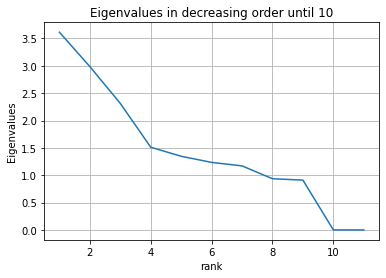

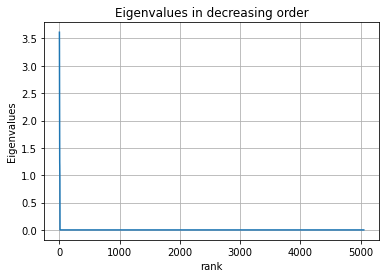

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigval[i]), eigvec[:,i]) for i in range(len(eigval))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs[0:15]:
    print(i[0])

vis_list([i[0] for i in eig_pairs[:11]], 'Eigenvalues in decreasing order until 10', 'Eigenvalues', 'rank')

vis_list([i[0] for i in eig_pairs], 'Eigenvalues in decreasing order', 'Eigenvalues', 'rank')

best LDA component number is 9

In [98]:
from sklearn.model_selection import cross_val_score
def report_acc_cv(clf, X, y, model_name, cv=10, scoring='accuracy'):

  acc = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
  accb = cross_val_score(clf, X, y, cv=cv, scoring='balanced_accuracy')
  f1 = cross_val_score(clf, X, y, cv=cv, scoring='f1_weighted')

  print(model_name," accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))
  print(model_name," balanced accuracy is: %.2f%% +- %.2f%%" %(np.mean(accb)*100,np.std(accb)*100))
  print(model_name," weighted f1-score is: %.2f%% +- %.2f%%" %(np.mean(f1)*100,np.std(f1)*100))

In [99]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import time

def draw_CM(clf, x, y, clf_name):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
  t0=time.time()
  clf.fit(X_train, y_train)
  print(clf_name+" training time:", round(time.time()-t0, 3), "s") # the time would be round to 3 decimal in seconds
  t1=time.time()
  y_pred = clf.predict(X_test)
  print(clf_name+" predict time:", round(time.time()-t1, 3), "s")
  confusion_mtx = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(confusion_mtx, keys, title='Confusion matrix '+clf_name)

### cross validation of different models on train set

#### draw confusion matrix, 10-fold cv on train dataset
##### Error analysis and identification of weaknesses
##### Measuring training and prediction time

#### use lda to reduce all features to 9

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=9)
x = lda.fit_transform(x, y)

In [102]:
evalx = lda.transform(evalx)

#### train and compare different model

Gaussian Naive Bayes Classifier  accuracy is: 89.85% +- 1.01%
Gaussian Naive Bayes Classifier  balanced accuracy is: 90.16% +- 1.13%
Gaussian Naive Bayes Classifier  weighted f1-score is: 89.84% +- 1.02%
GaussianNaiveBayes training time: 0.005 s
GaussianNaiveBayes predict time: 0.002 s
LogisticRegression  accuracy is: 90.39% +- 1.03%
LogisticRegression  balanced accuracy is: 90.20% +- 1.16%
LogisticRegression  weighted f1-score is: 90.38% +- 1.03%
LogisticRegression training time: 0.692 s
LogisticRegression predict time: 0.001 s
DecisionTreeClassifier  accuracy is: 83.78% +- 1.19%
DecisionTreeClassifier  balanced accuracy is: 83.47% +- 1.22%
DecisionTreeClassifier  weighted f1-score is: 83.78% +- 1.08%
DecisionTree training time: 0.152 s
DecisionTree predict time: 0.001 s


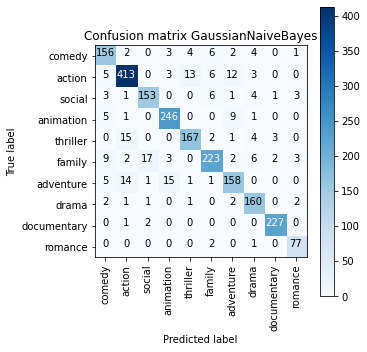

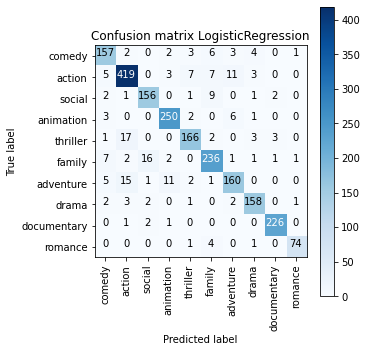

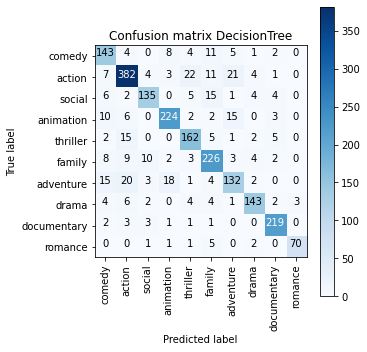

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(random_state=42)

clf = GaussianNB()

DT = DecisionTreeClassifier()


report_acc_cv(clf, x, y, 'Gaussian Naive Bayes Classifier')
draw_CM(clf, x, y, 'GaussianNaiveBayes')
report_acc_cv(lr, x, y, 'LogisticRegression')
draw_CM(lr, x, y, 'LogisticRegression')
report_acc_cv(DT, x, y, 'DecisionTreeClassifier')
draw_CM(DT, x, y, 'DecisionTree')

svm  accuracy is: 90.14% +- 0.92%
svm  balanced accuracy is: 90.99% +- 1.02%
svm  weighted f1-score is: 90.14% +- 0.93%
svm training time: 0.598 s
svm predict time: 0.251 s


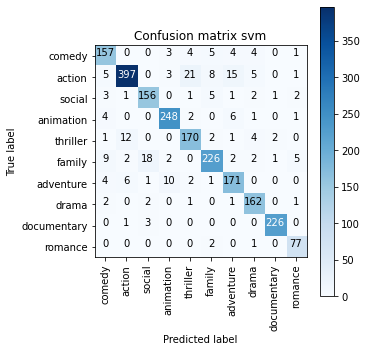

In [105]:
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


class_weight='balanced'
clf = svm.SVC(kernel='rbf',class_weight=class_weight)
report_acc_cv(clf, x, y, 'svm')
draw_CM(clf, x, y, 'svm')

MLP  accuracy is: 88.48% +- 0.75%
MLP  balanced accuracy is: 88.26% +- 0.93%
MLP  weighted f1-score is: 88.46% +- 0.75%
MLP training time: 24.155 s
MLP predict time: 0.005 s


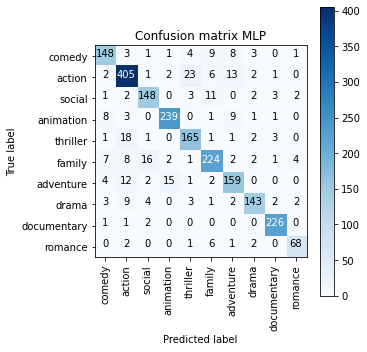

In [106]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=30000)

report_acc_cv(clf, x, y, 'MLP')
draw_CM(clf, x, y, 'MLP')

### predicate eval data genre with best model, best model with best accuracy, balanced accuracy and f1-score is SVM

In [107]:
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

class_weight='balanced'
clf = svm.SVC(kernel='rbf',class_weight=class_weight)
clf.fit(x,y)
y_pred = clf.predict(evalx)

y_pred

array([7, 3, 0, ..., 4, 3, 1])

In [108]:
dictionary
eval_pred = pd.read_csv('eval_set.csv')
eval_pred['genre'] = [list(dictionary.keys())[list(dictionary.values()).index(int(i))] for i in y_pred]
eval_pred.head()

,video_id,title_fa,description_fa,age_rating,country_fa,production_year,duration,image,genre
0,E0yLLCIp,دونده هزارتو,NaN,,آمریکا,2014.0,01:54:00,videos_covers_921fbbc1-0d58-4378-8e5b-92193edf...,drama
1,wCFnNqf6,ماجراهای اسکوارت,در کارتون ماجراهای اسکوارت : سرزمین رویاهای کو...,7.0,کانادا,2003.0,00:49:01,videos_covers_f27599fe-0d9a-47ce-b796-997b2429...,animation
2,2gZF76hm,خانم یایا,عبدالرضا کاهانی نویسنده و کارگردان زاده ۱ دی ۱...,13.0,ایران,2019.0,01:19:15,videos_covers_589607ad-e02f-443f-91f7-ac6c2388...,comedy
3,HrSbo_Fullmetal_Alchemist_E_filimo_series,کیمیاگر تمام فلزی,بعد از یک آزمایش شکست خورده کیمیاگری برای زند...,7.0,ژاپن,2003.0,,videos_covers_08cff5a5-0b18-4df5-ac8d-02744a74...,adventure
4,Bring_Me_the_Head_of_Alfredo_Garcia_5txA1_filimo,سر آلفردو گارسیا را برایم بیاورید,فیلم سر آلفردو گارسیا را برایم بیاورید اثر کمت...,17.0,آمریکا,1974.0,01:17:11,videos_covers_393f9008-f5fd-43cc-b222-4b28c060...,family


### prediction of eval set for final evaluation in eval_svm_pred.csv file.

In [109]:
eval_pred.to_csv('eval_svm_pred.csv')